# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-raw-SOI-data-against-raw-case-count-data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Check raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-national-SOI" data-toc-modified-id="Plot-national-SOI-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Plot national SOI</a></span></li><li><span><a href="#Plot-cases-under-investigation-by-state" data-toc-modified-id="Plot-cases-under-investigation-by-state-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Plot cases under investigation by state</a></span></li></ul></li><li><span><a href="#Local-cases---speculative" data-toc-modified-id="Local-cases---speculative-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Local cases - speculative</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-tranmission" data-toc-modified-id="Create-dataframe-of-local-tranmission-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create dataframe of local tranmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li><li><span><a href="#Current-outbreaks" data-toc-modified-id="Current-outbreaks-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Current outbreaks</a></span></li><li><span><a href="#Historic-Outbreaks" data-toc-modified-id="Historic-Outbreaks-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Historic Outbreaks</a></span></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_t$" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_t$-8.8"><span class="toc-item-num">8.8&nbsp;&nbsp;</span>Model for the effective reproduction number $R_t$</a></span></li><li><span><a href="#Comparative-$R_t$-and-GF" data-toc-modified-id="Comparative-$R_t$-and-GF-8.9"><span class="toc-item-num">8.9&nbsp;&nbsp;</span>Comparative $R_t$ and GF</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-8.10"><span class="toc-item-num">8.10&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#Explore-cases-to-deaths-curve" data-toc-modified-id="Explore-cases-to-deaths-curve-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Explore cases to deaths curve</a></span><ul class="toc-item"><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

#pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  

# used in charts of the recent period
RECENT = 92 # days

### Warnings

In [3]:
warning_count = 0
warnings = []

def warn(message: str) -> None:
    if message:
        print(message)
        warnings.append(message)
    global warning_count
    warning_count += 1
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# Constants across all tests
state_pop = {
    # source: https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release
    # population at 30 June 2020
    'NSW':        8_164_100,
    'Victoria':   6_694_900,
    'Queensland': 5_174_400,
    'SA':         1_769_300,
    'WA':         2_661_900,
    'Tasmania':     540_600,
    'ACT':          431_100,
    'NT':           246_000,
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor

Australian population: 25,682,300


## Get the data

In [5]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [6]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [7]:
# Quick peak at the data columns
raw_json_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT'],
      dtype='object')

In [8]:
# Quick look at the categorising column
raw_json_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

## Capture cumulative and daily data for selected columns

In [9]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
    #'VACC_PEOPLE_CNT': 'vacc people',
}

In [10]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = (
        raw_json_data
        .pivot(index='REPORT_DATE', columns='NAME', values=item)
        .sort_index(ascending=True)
    )
    
    # check if last row completely missing
    #if True: # just delete the last row ... 
    if table.iloc[-1].isna().all():
        warn(f'Last row of {item} deleted as all items missing')
        table.drop(index=table.index[-1], axis=0, inplace=True)
    
    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'It looks like we are missing the latest {item} '
             f'for {", ".join(situation[situation].index.to_list())}')

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {item} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [11]:
def get_item(item, raw_json_data):
    """Return a tuple of data for an item in the raw raw_json_data.
       The first element in the tuple is a DataFrame dates-x-states for item.
       - Replace NANs at the end of the DataFrame with previous value (forward-fill).
       - Replace other NANs in the DataFrame with zero.
       - Change DataFrame type to int (which can only be done with NANs removed)
       The second element is a Boolean mask for missing values at the end
       of the first DataFrame. """
    
    
    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()
    end_nan_mask['Australia'] = end_nan_mask.any(axis=1)
    
    data = (
        raw
        .ffill()
        .fillna(0)
        .astype(int)
    )

    return data, end_nan_mask

In [12]:
cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}
end_nans = {}

for item in selected_cols.keys():
    # get the raw cumulative data
    cum_u[item], end_nans[item] = get_item(item, raw_json_data)

    # adjusted daily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False)
    )

It looks like we are missing the latest TEST_CNT for ACT, SA, Tasmania, WA


In [13]:
# raw daily new cases  
cum_u['CASE_CNT'].diff().tail(10)

NAME          ACT  Australia    NSW   NT  Queensland   SA  Tasmania  Victoria  \
REPORT_DATE                                                                     
2021-08-12    1.0      382.0  343.0  0.0        11.0  0.0       0.0      27.0   
2021-08-13    4.0      411.0  384.0  0.0         8.0  0.0       0.0      15.0   
2021-08-14    1.0      492.0  463.0  0.0         7.0  0.0       0.0      21.0   
2021-08-15    3.0      439.0  411.0  0.0         0.0  0.0       0.0      25.0   
2021-08-16   19.0      519.0  475.0  1.0         0.0  0.0       0.0      22.0   
2021-08-17   17.0      482.0  438.0  0.0         2.0  0.0       0.0      25.0   
2021-08-18   22.0      677.0  627.0  0.0         4.0  0.0       0.0      23.0   
2021-08-19   16.0      748.0  674.0  0.0         0.0  1.0       0.0      57.0   
2021-08-20   11.0      706.0  636.0  0.0         1.0  0.0       0.0      57.0   
2021-08-21    8.0      891.0  820.0  0.0         2.0  0.0       0.0      61.0   

NAME          WA  
REPORT_DATE       
2021-08-12   0.0  
2021-08-13   0.0  
2021-08-14   0.0  
2021-08-15   0.0  
2021-08-16   2.0  
2021-08-17   0.0  
2021-08-18   1.0  
2021-08-19   0.0  
2021-08-20   1.0  
2021-08-21   0.0

## Weekly charts

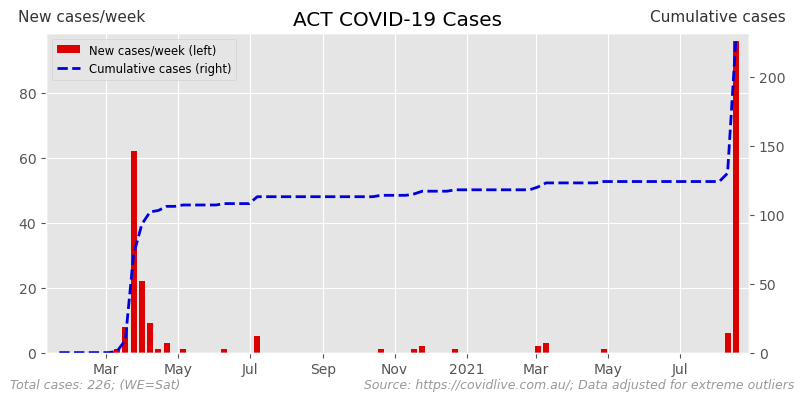

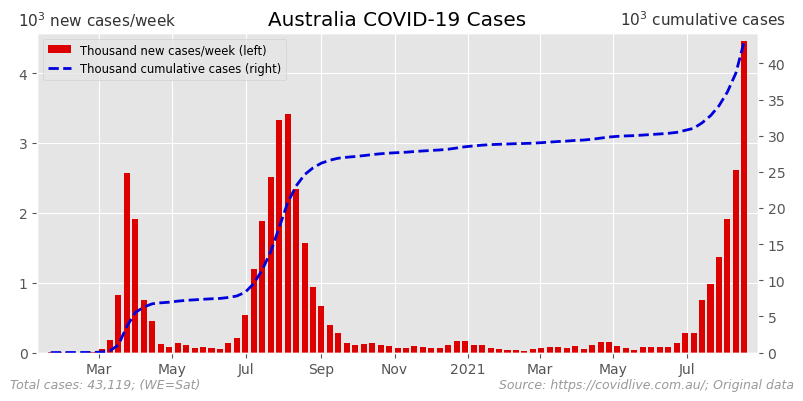

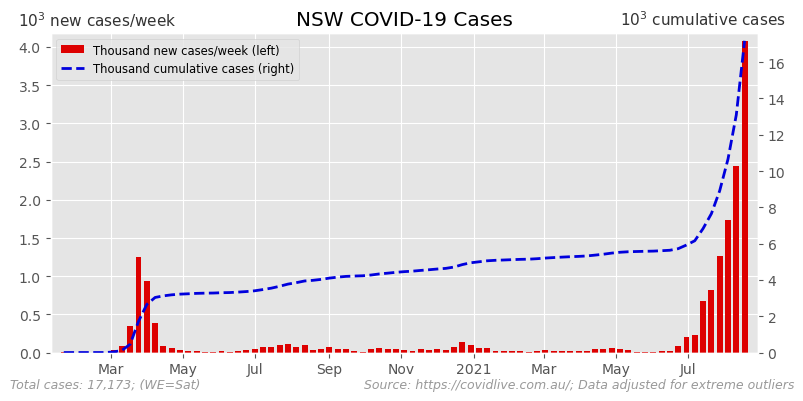

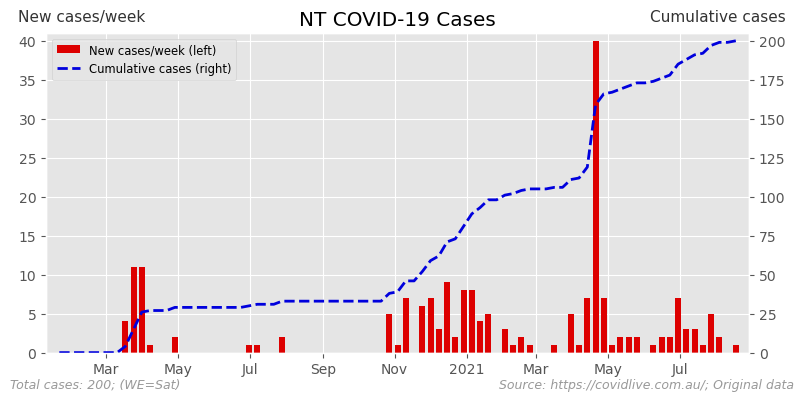

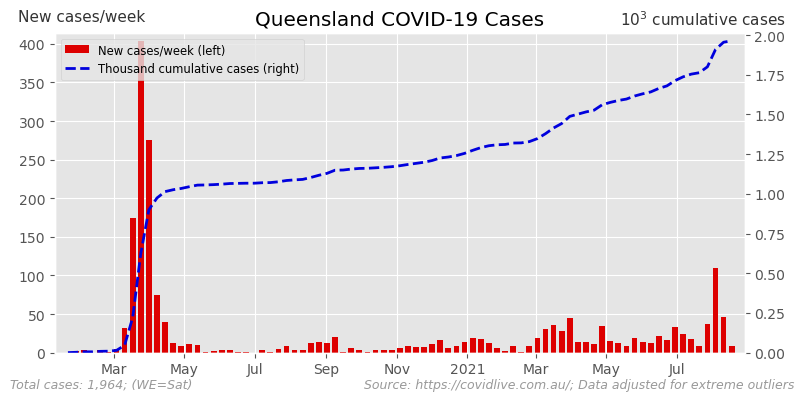

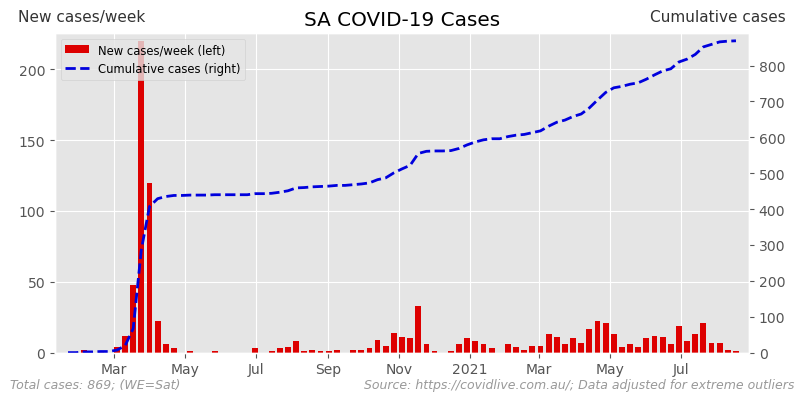

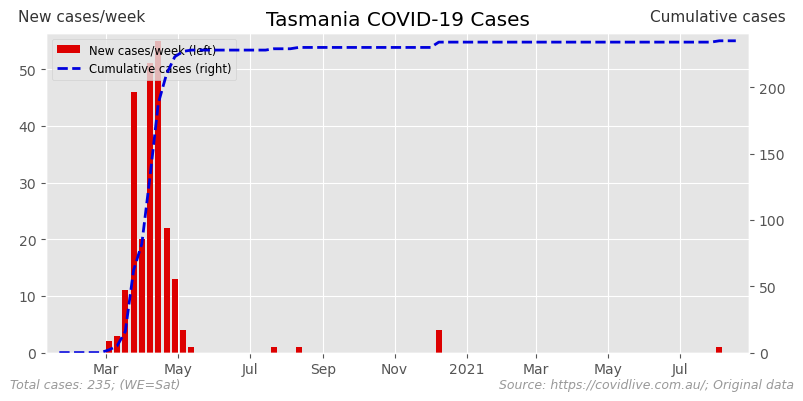

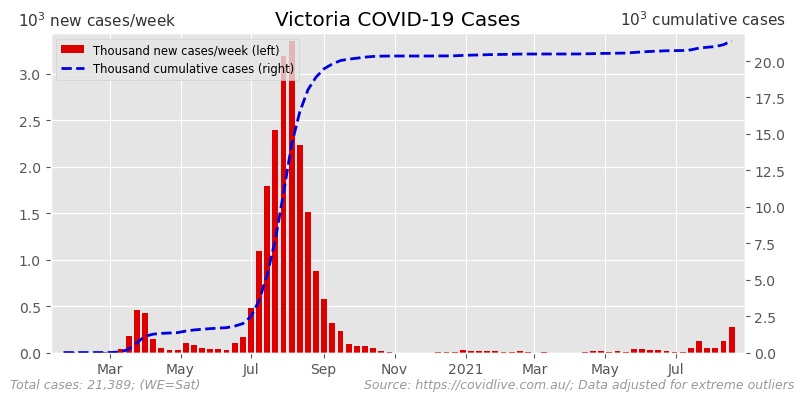

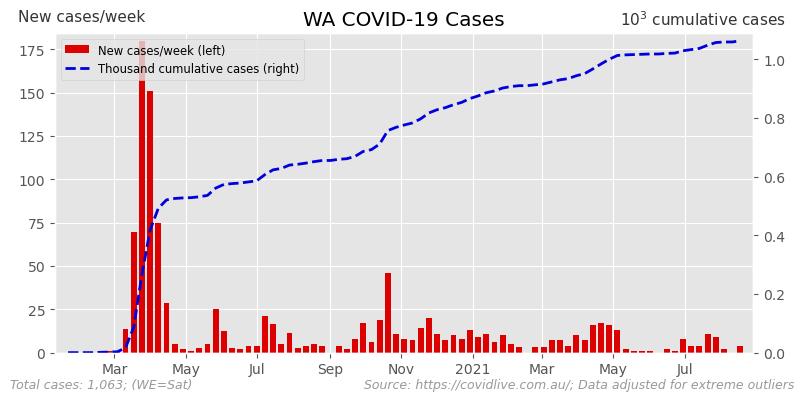

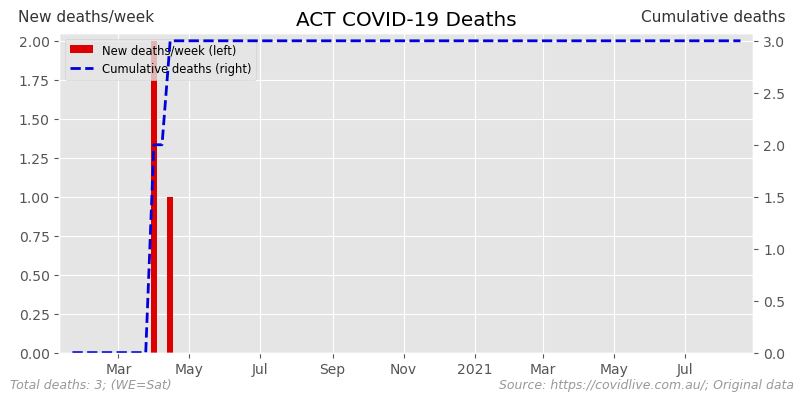

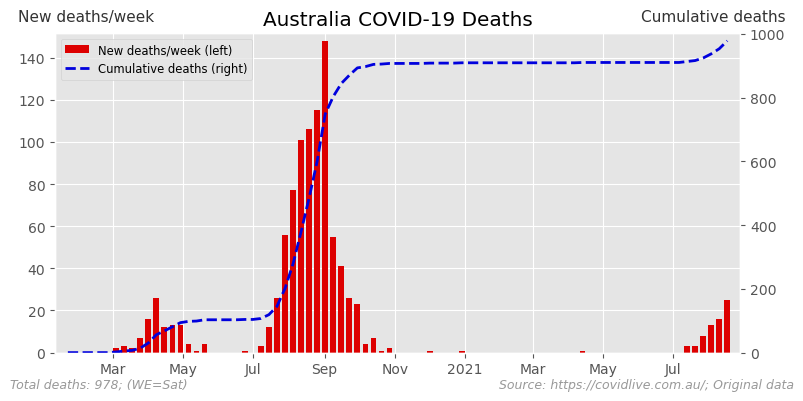

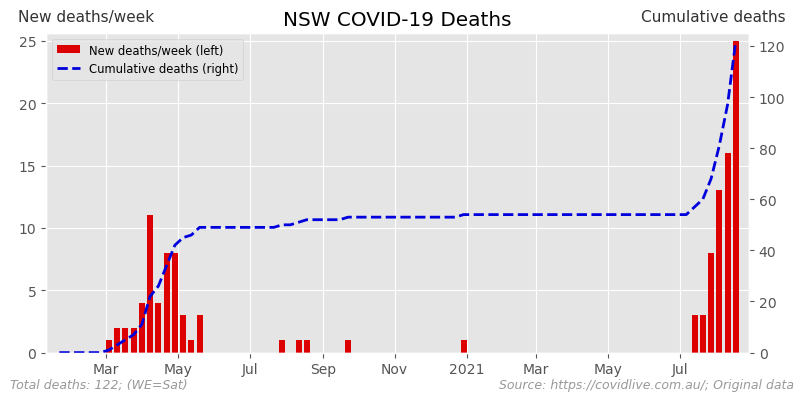

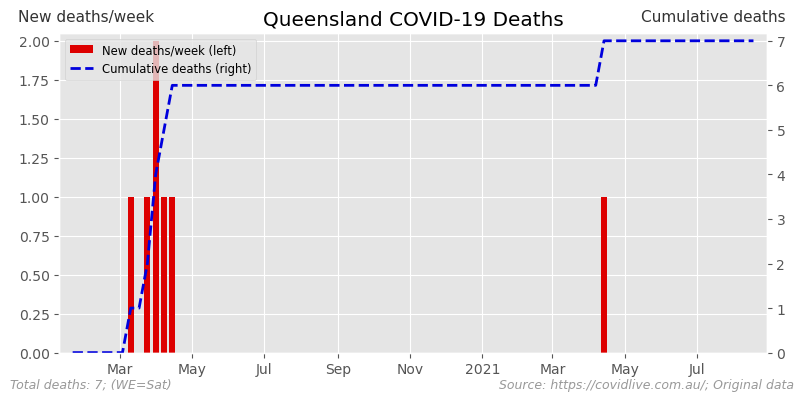

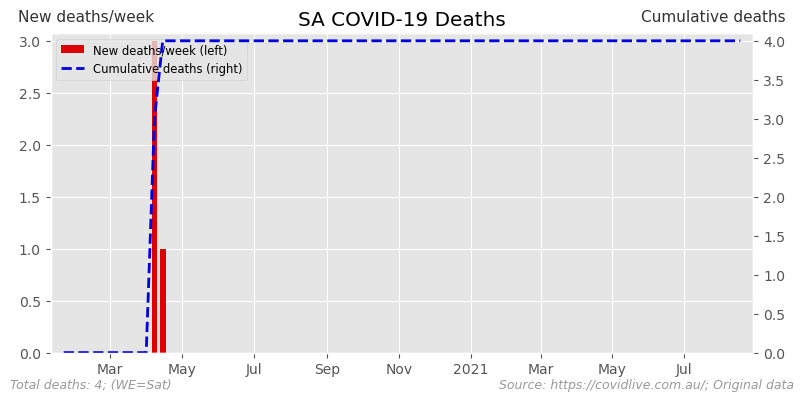

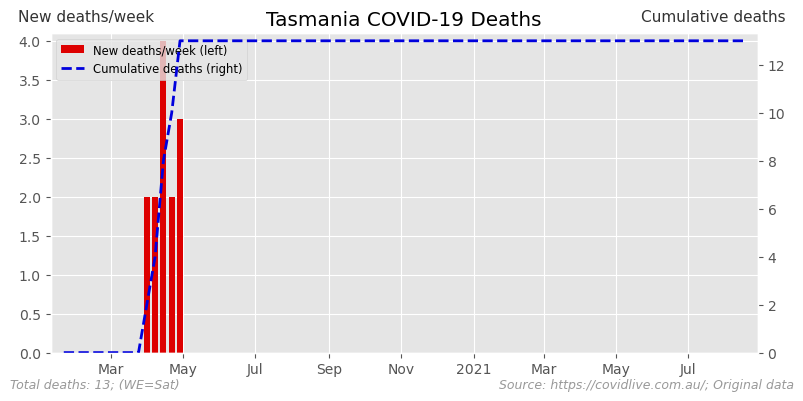

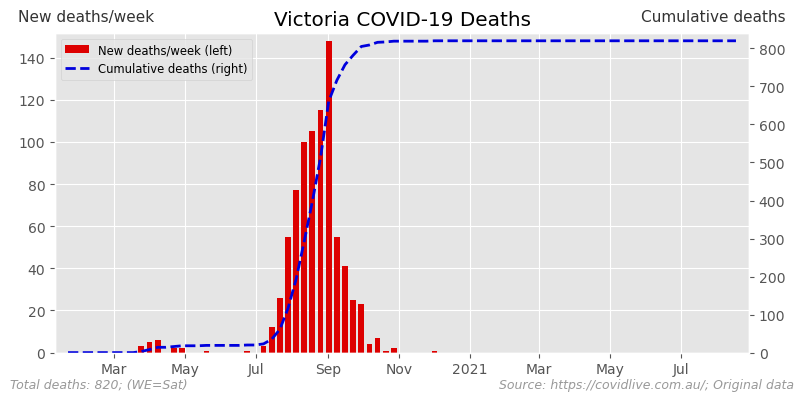

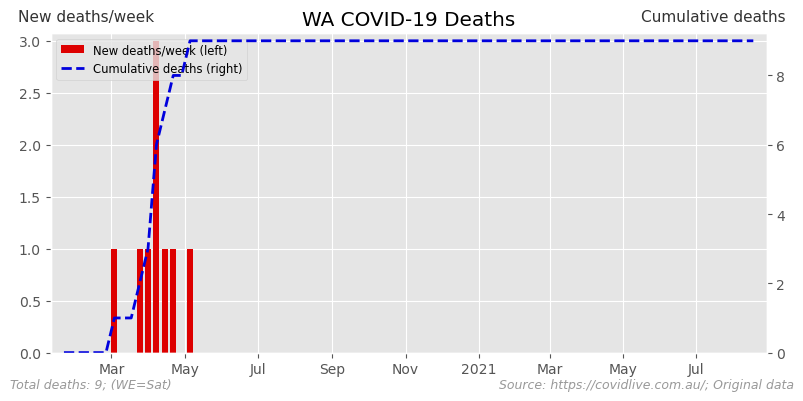

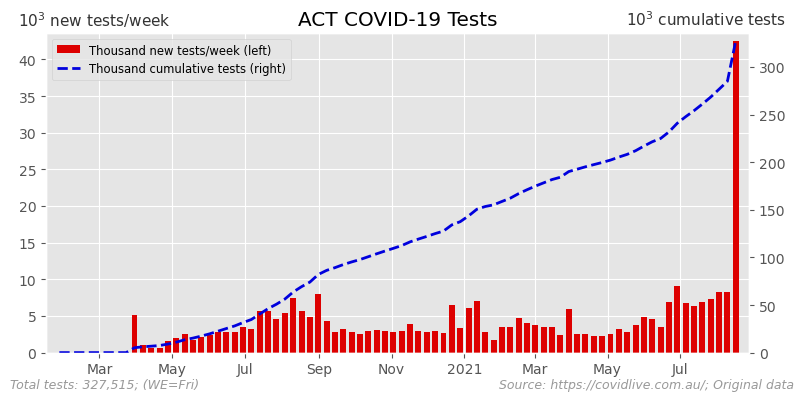

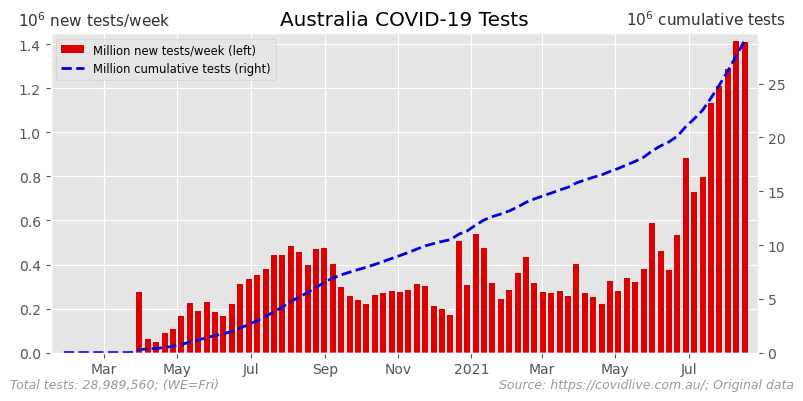

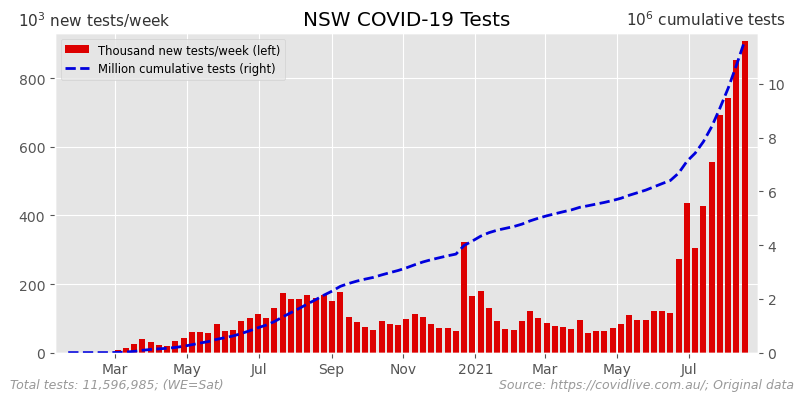

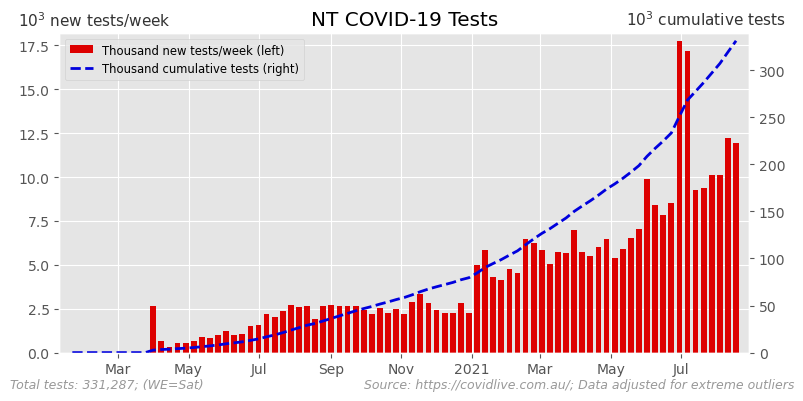

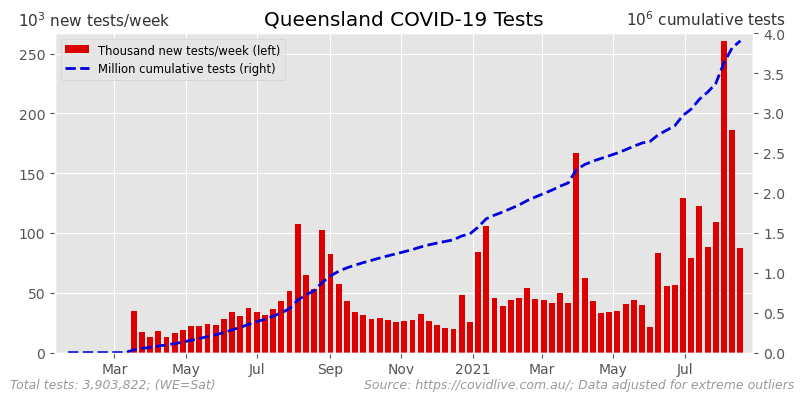

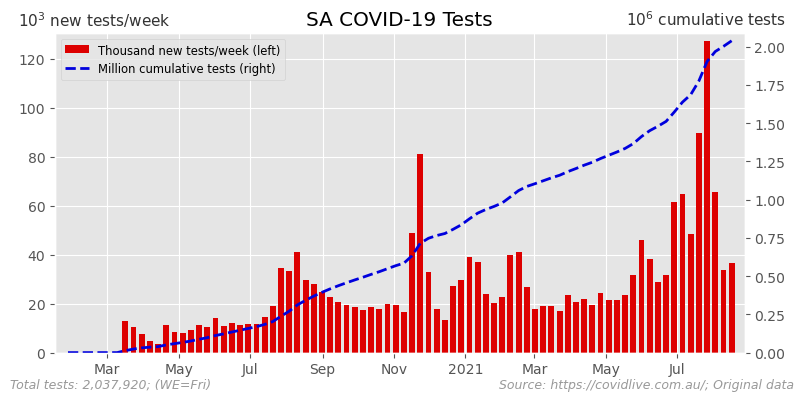

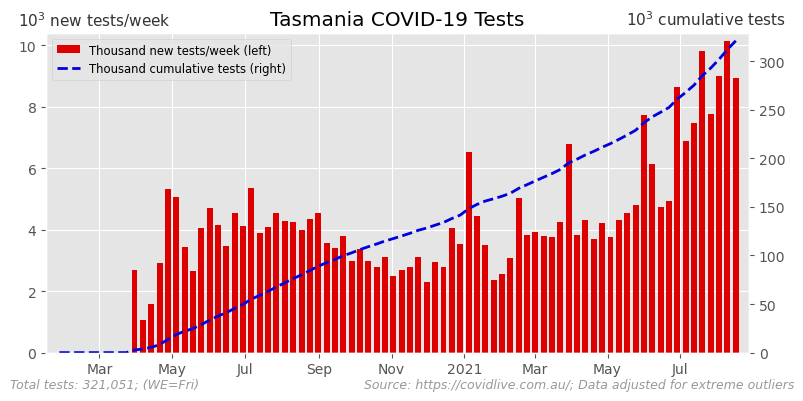

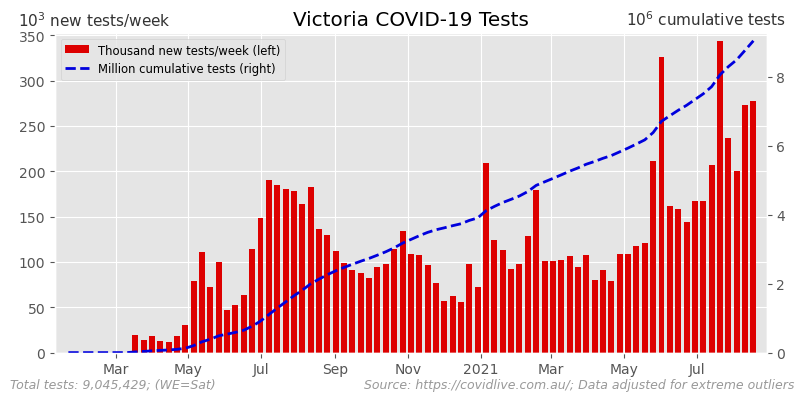

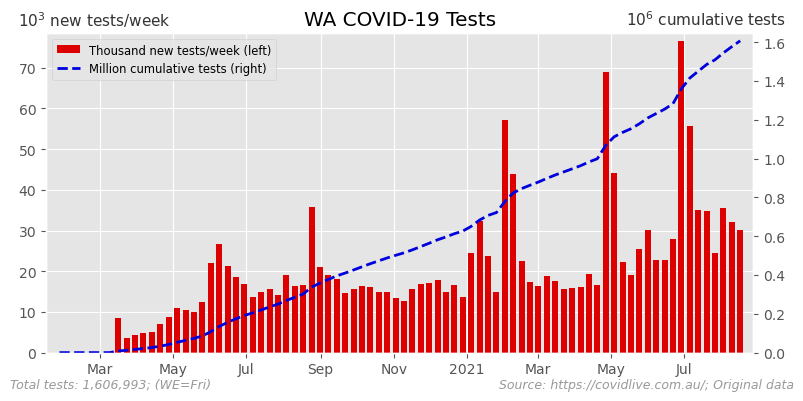

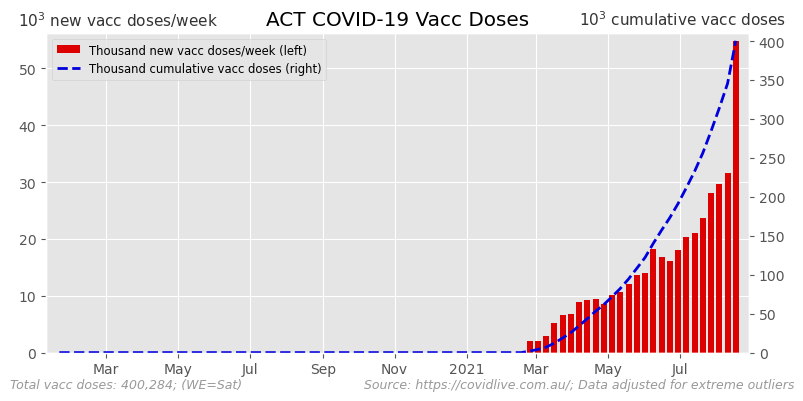

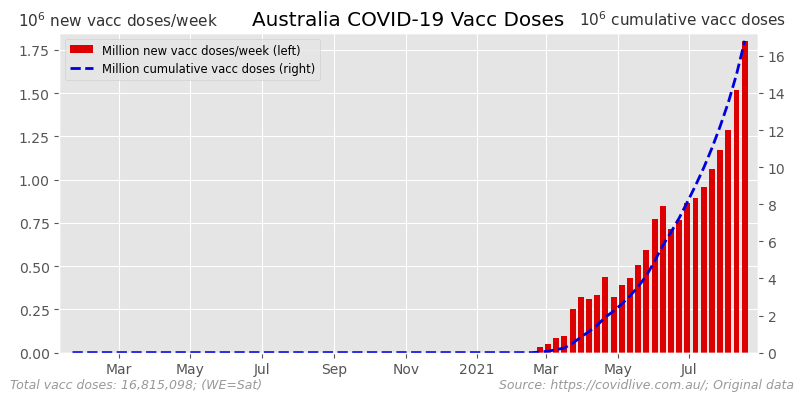

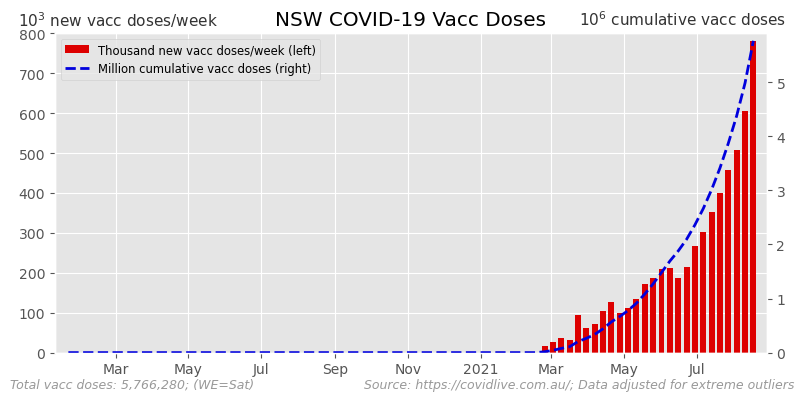

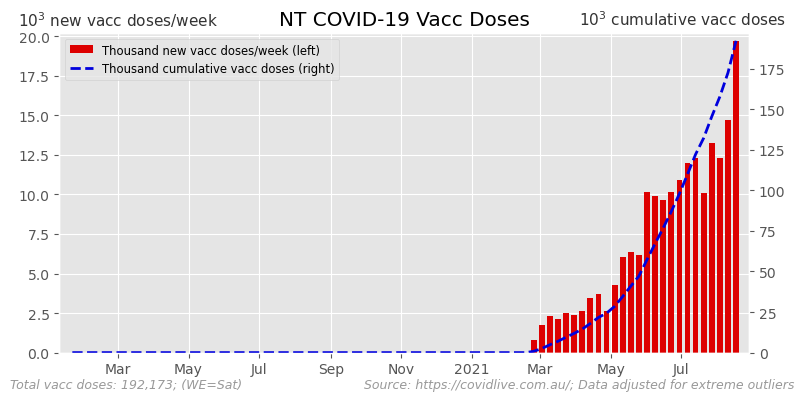

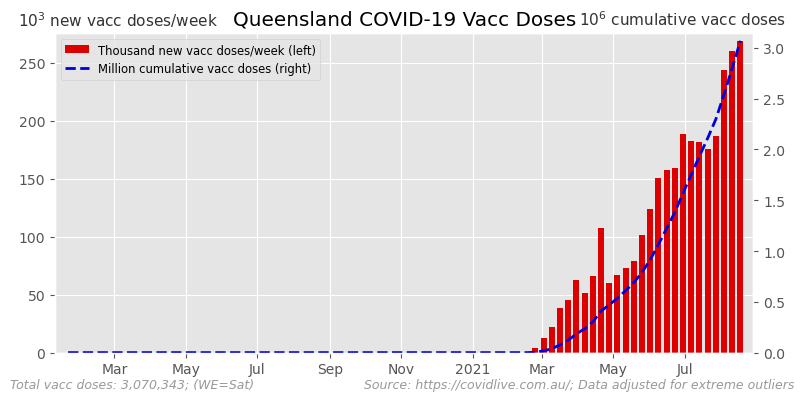

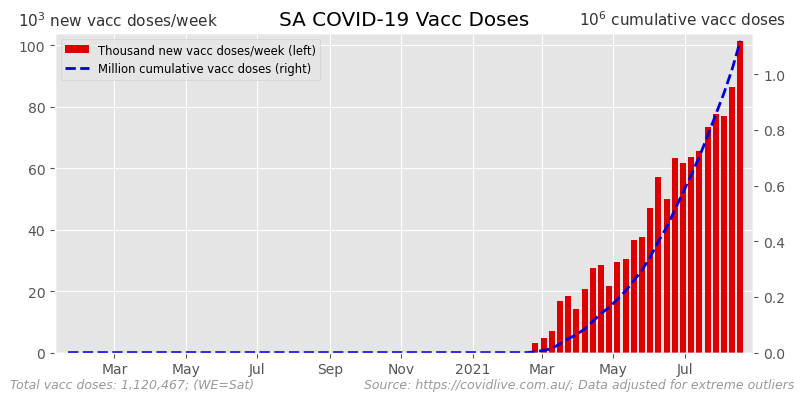

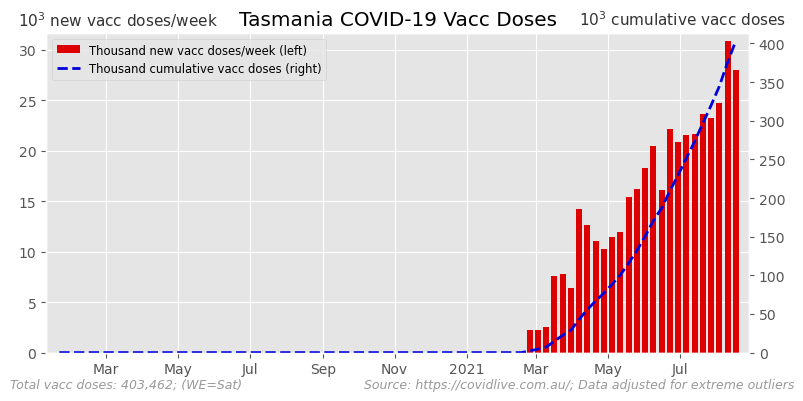

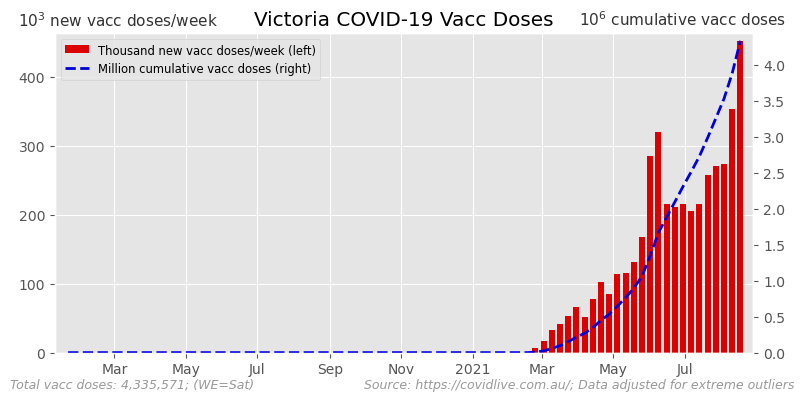

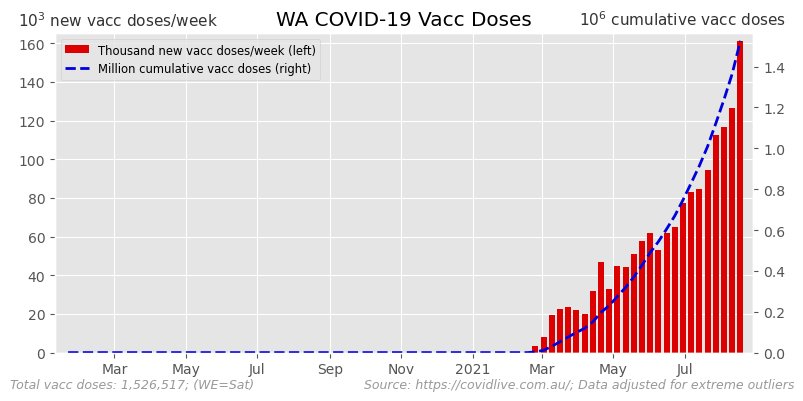

In [14]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    # restore end_nans to get appropriate weekly charts
    daily = daily_c[item].where(~end_nans[item], other=np.nan)
    
    _ = ps.plot_weekly(
                       daily, desc, quality, 
                       chart_directory=CHART_DIRECTORY+'-!weekly-',
                       show=True,
                      )

## Bar Charts

In [15]:
def two_bar_plots(data_dict, item, prefix, desc):
    """latest cumulative and cumulative per population charts
       Note: incomplete data on the last day is ignored."""
    
    last_row = data_dict[item].iloc[-1].sort_values()
    #last_row = last_row[last_row > 0]
    if not len(last_row):
        # no data to plot
        return None
    date = data_dict[item].index[-1].ctime()[:10]
    
    for extra in '', f' per {power_text.lower()} population':
        ps.plot_barh(last_row, 
                     title=f'{prefix} COVID19 {desc}{extra}'.strip(),
                     save_as = f'{CHART_DIRECTORY}!bar-chart-{prefix}-{desc}-{extra}.png',
                     rfooter=SOURCE + ' ' + date,
                     show=True,
                    )
        
        # per capita second time round ...
        last_row = (last_row / state_pop).round(1).sort_values()

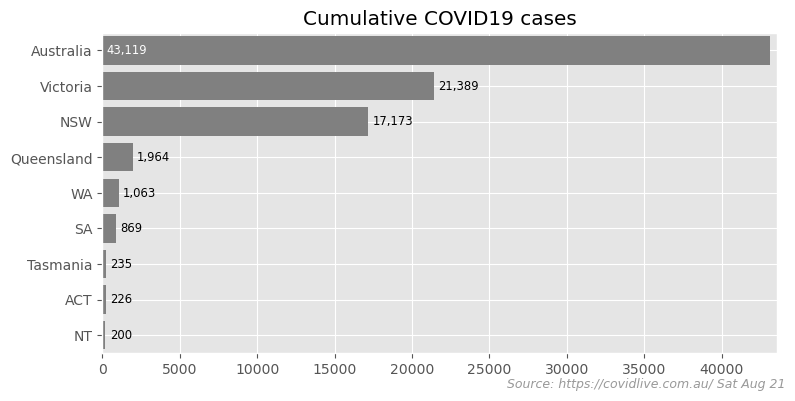

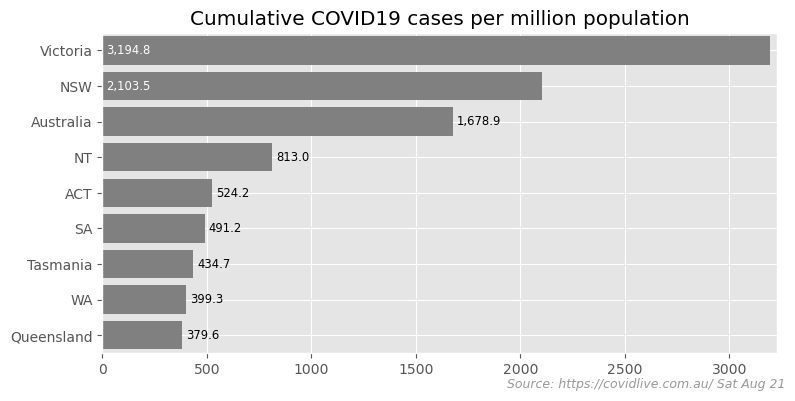

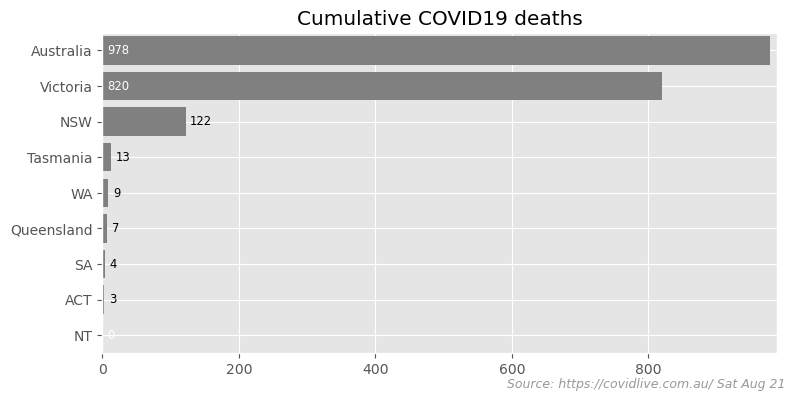

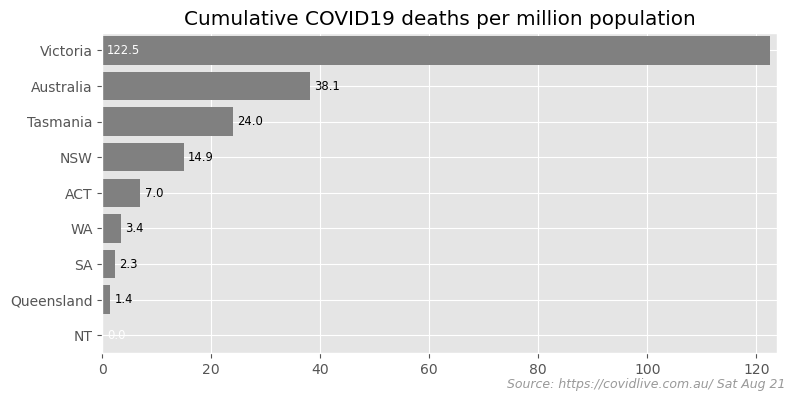

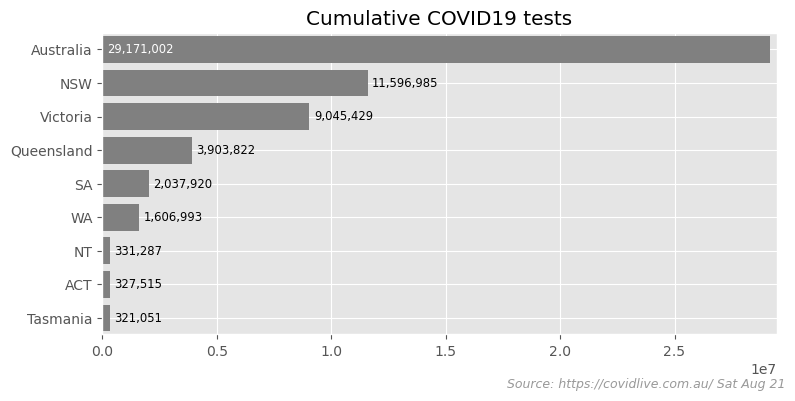

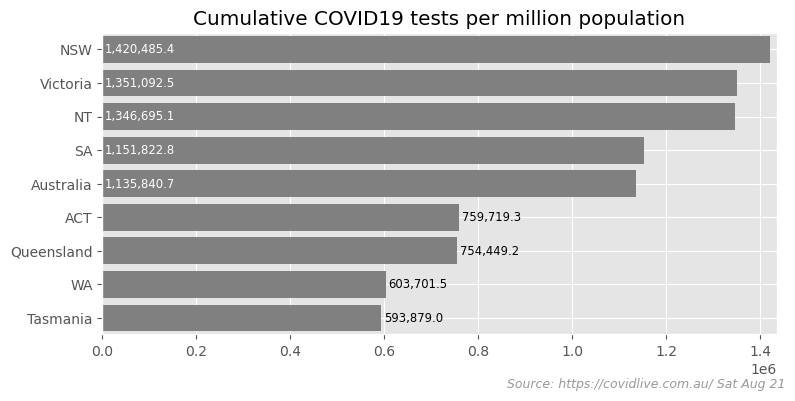

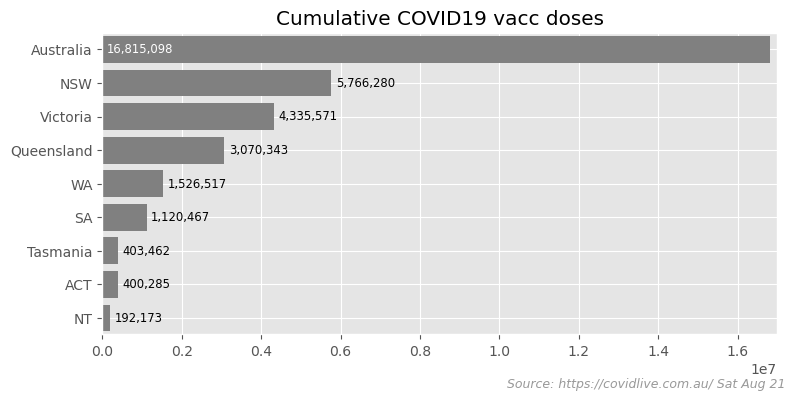

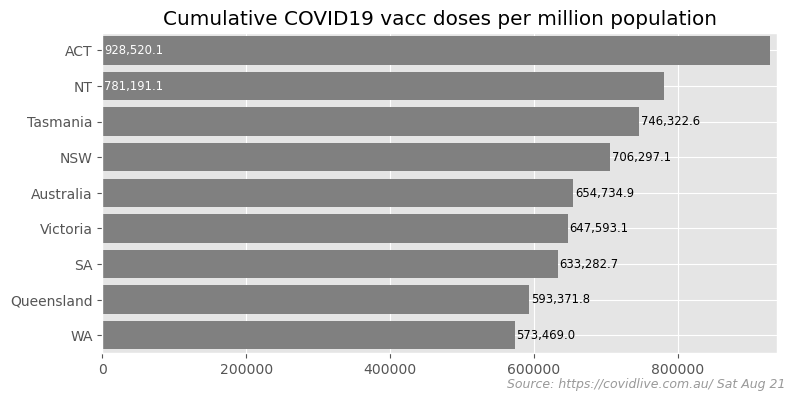

In [16]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [17]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [18]:
# capture active items, with nans where data is not up to date
item = 'ACTIVE_CNT'
active_all, active_end_nans = get_item(item, raw_json_data)
active_all = active_all.where(~active_end_nans, other=np.nan)
active_all.tail()

Lastest value less than its predecessor in ACTIVE_CNT for Queensland


NAME         ACT  Australia   NSW  NT  Queensland  SA  Tasmania  Victoria  WA
REPORT_DATE                                                                  
2021-08-17    45       7799  7409   3         110   2         0       227   3
2021-08-18    67       8437  8020   3          97   1         0       246   3
2021-08-19    83       8937  8473   1          79   2         0       296   3
2021-08-20    94       9496  8978   1          68   2         0       349   4
2021-08-21   102      10206  9657   1          51   2         0       389   4

### Bar chart of active cases

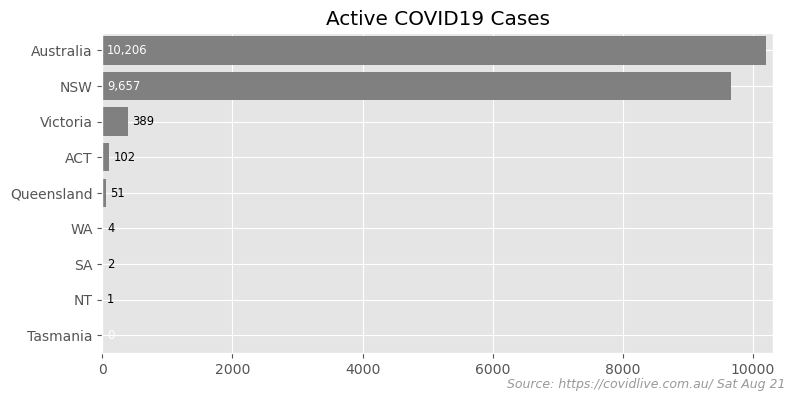

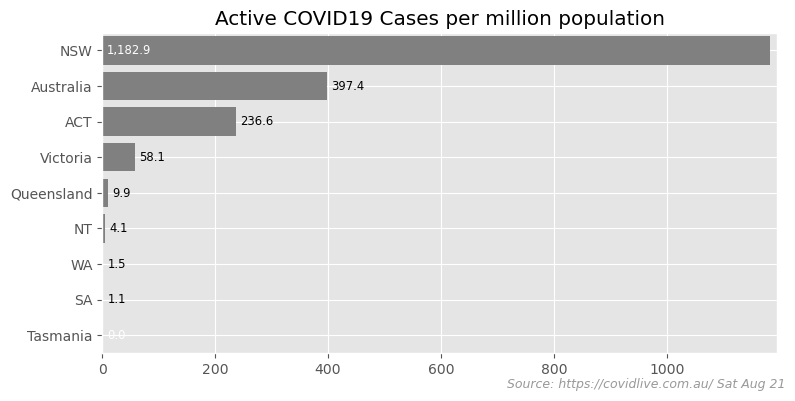

In [19]:
# bar chart of latest active cases, where data is complete
active_every_one = active_all[active_all.notna().all(axis=1)]
a_dict = {'active': active_every_one}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

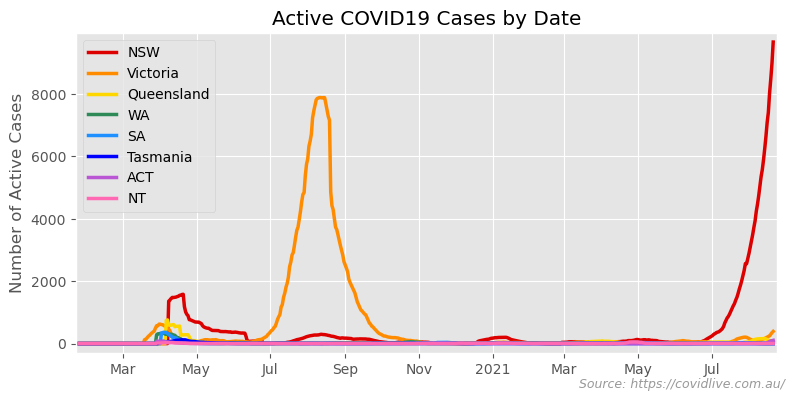

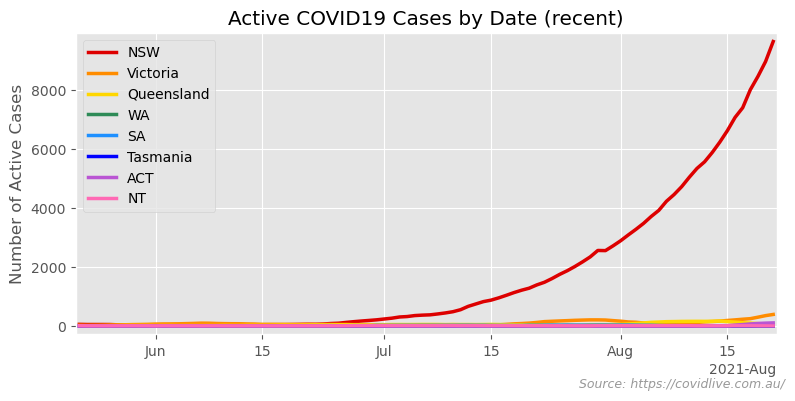

In [20]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
    
order = ['NSW', 'Victoria', 'Queensland', 
         'WA', 'SA', 'Tasmania', 'ACT', 'NT']
title = 'Active COVID19 Cases by Date'
MARGINS = (0.005, 0.03)
for recent in [0, RECENT]:
    data = active_all.iloc[-recent:]

    fig, ax = plt.subplots()
    ax.xaxis_date()
    for state in order:
        ax.plot(active_all.index[-recent:].values, 
            active_all[state].iloc[-recent:], 
            label=state, lw=2.5)
    ax.margins(*MARGINS)
    ax.legend(loc='upper left')
    title_extra = ''
    if recent > 0:
        title_extra = ' (recent)'
    
    ps.finalise_plot(ax, title=title+title_extra, 
                     xlabel=None,
                     chart_directory=CHART_DIRECTORY,
                     ylabel='Number of Active Cases',
                     rfooter=SOURCE,
                     show=True,
                    )

## Source of infection

### Extraction

In [21]:
Australia = 'Australia'
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((raw_json_data.columns.str[:3] == 'SRC').sum() == len(names))

In [22]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in names.keys():
        table, end_nans = get_item(item, raw_json_data)
        table = table.where(~end_nans, other=np.nan)
        if Australia in table.columns: del table[Australia]
        soi_tables[names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia: continue
        table = pd.DataFrame()
        for item in names.keys():
            table[names[item]] = soi_tables[names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national) 
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [23]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

### Check raw SOI data against raw case count data

In [24]:
soi_cases = {name: x.sum(axis=1) for name, x in state_soi_tables.items()}
soi_cases = pd.DataFrame(soi_cases)
soi_cases.tail(15)

NSW  Victoria  Queensland   SA    WA  Tasmania  ACT   NT
REPORT_DATE                                                            
2021-08-07   10656     20997        1909  866  1059       235  124  199
2021-08-08   10917     21010        1918  868  1059       235  124  199
2021-08-09   11201     21021        1923  868  1059       235  124  199
2021-08-10   11557     21041        1926  868  1059       235  124  199
2021-08-11   11902     21056        1929  868  1059       235  124  199
2021-08-12   12245     21083        1940  868  1059       235  125  199
2021-08-13   12629     21098        1948  868  1059       235  129  199
2021-08-14   13092     21119        1955  868  1059       235  130  199
2021-08-15   13503     21144        1955  868  1059       235  133  199
2021-08-16   13978     21166        1955  868  1061       235  152  200
2021-08-17   14416     21191        1957  868  1061       235  169  200
2021-08-18   15043     21214        1961  868  1062       235  191  200
2021-08-19   15717     21271        1961  869  1062       235  207  200
2021-08-20   16353     21328        1962  869  1063       235  218  200
2021-08-21   17173     21389        1964  869  1063       235  226  200

In [25]:
cases = cum_u['CASE_CNT'][soi_cases.columns]
cases.tail(15)

NAME           NSW  Victoria  Queensland   SA    WA  Tasmania  ACT   NT
REPORT_DATE                                                            
2021-08-07   10656     20997        1909  866  1059       235  124  199
2021-08-08   10917     21010        1918  868  1059       235  124  199
2021-08-09   11201     21021        1923  868  1059       235  124  199
2021-08-10   11557     21041        1926  868  1059       235  124  199
2021-08-11   11902     21056        1929  868  1059       235  124  199
2021-08-12   12245     21083        1940  868  1059       235  125  199
2021-08-13   12629     21098        1948  868  1059       235  129  199
2021-08-14   13092     21119        1955  868  1059       235  130  199
2021-08-15   13503     21144        1955  868  1059       235  133  199
2021-08-16   13978     21166        1955  868  1061       235  152  200
2021-08-17   14416     21191        1957  868  1061       235  169  200
2021-08-18   15043     21214        1961  868  1062       235  191  200
2021-08-19   15717     21271        1961  869  1062       235  207  200
2021-08-20   16353     21328        1962  869  1063       235  218  200
2021-08-21   17173     21389        1964  869  1063       235  226  200

In [26]:
state_soi_tables['ACT'].tail(14)

Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2021-08-08         95           3             25                1   
2021-08-09         95           3             25                1   
2021-08-10         95           3             25                1   
2021-08-11         95           8             20                1   
2021-08-12         95           8             20                1   
2021-08-13         95           8             24                1   
2021-08-14         95           8             24                1   
2021-08-15         95           8             26                1   
2021-08-16         95           8             36                1   
2021-08-17         95           8             50                1   
2021-08-18         95           9             80                3   
2021-08-19         95           9             87                3   
2021-08-20         95           8            104                1   
2021-08-21         95           8            112                1   

             Investigating  
REPORT_DATE                 
2021-08-08               0  
2021-08-09               0  
2021-08-10               0  
2021-08-11               0  
2021-08-12               1  
2021-08-13               1  
2021-08-14               2  
2021-08-15               3  
2021-08-16              12  
2021-08-17              15  
2021-08-18               4  
2021-08-19              13  
2021-08-20              10  
2021-08-21              10

### Plot national SOI 

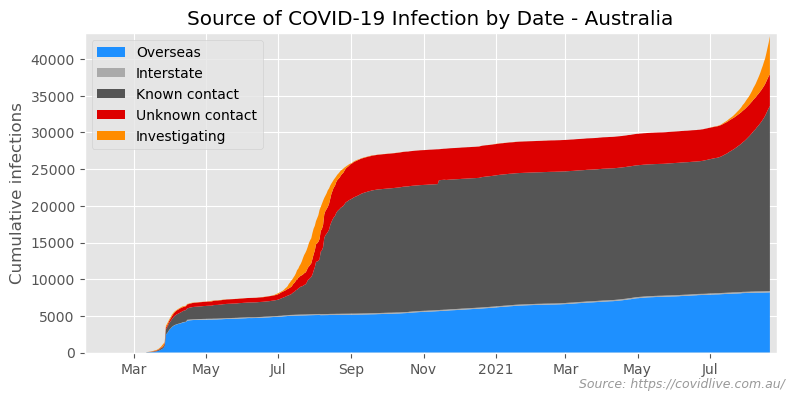

In [27]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)

labels = list(names.values())
args = [soi_national[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(soi_national.index, *args, labels=labels)
ax.legend(loc='upper left')
ax.margins(0.01)

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel=None, ylabel='Cumulative infections',
                 rfooter=SOURCE,
                 show=True,
                )

In [28]:
# extract the latest data, and under investigation
latest = pd.DataFrame()
for state in state_soi_tables.keys():
    latest[state] = state_soi_tables[state].iloc[-1]

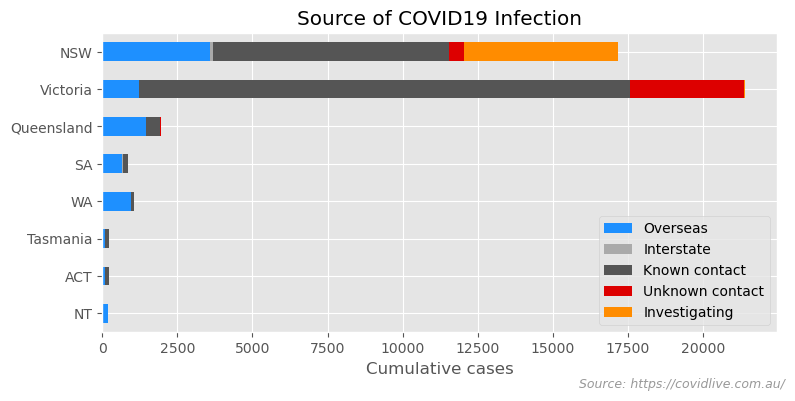

In [29]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel='Cumulative cases', ylabel=None,
                 rfooter=SOURCE,
                 show=True,
                )

### Plot cases under investigation by state

In [30]:
under_investigation = soi_tables['Investigating']

# These are running totals (and will go up and down)
under_investigation.tail()

NAME         ACT   NSW  NT  Queensland  SA  Tasmania  Victoria  WA
REPORT_DATE                                                       
2021-08-17    15  3464   0           0   0         0        15   0
2021-08-18     4  3803   0           0   0         0        14   0
2021-08-19    13  4179   0           0   0         0        13   0
2021-08-20    10  4560   0           0   0         0        16   0
2021-08-21    10  5134   0           0   0         0        29   0

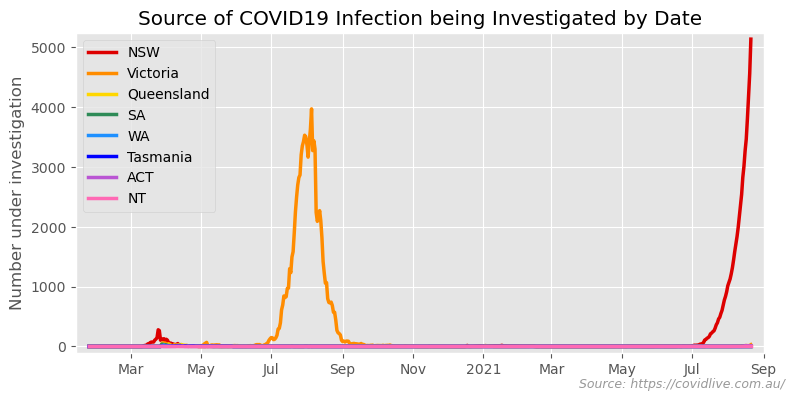

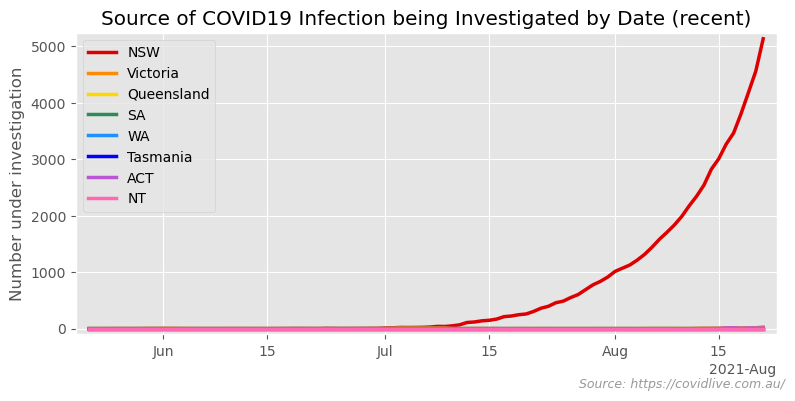

In [31]:
# plot under investigation
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
for recent in [0, RECENT]:
    fig, ax = plt.subplots()
    ax.margins(0.02)
    for state in state_soi_tables.keys():
        ax.plot(under_investigation.index[-recent:],
                under_investigation[state].iloc[-recent:],
                lw=2.5, label=state)
    ax.legend(loc='best')
    title = 'Source of COVID19 Infection being Investigated by Date'
    plus = ''
    if recent > 0:
        plus = ' (recent)'

    ps.finalise_plot(ax, 
                     title=title+plus, 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None, ylabel='Number under investigation',
                     rfooter=SOURCE,
                     show=True,
                    )

## Local cases - speculative 
Note: calculated using the source of infection (SOI) data
Note: offten the SOI data doesn't match the cases data, even though it should.

### Create dataframe of local tranmission

In [32]:
# calculate raw data from from Sourse of Infection data collected above
local_trans = list(names.values()) # names dictionary defined above
local_trans.remove('Overseas')

def get_local_trans():
    local_trans_d = {}
    for state in state_soi_tables.keys():
        local_trans_d[state] = state_soi_tables[state][local_trans].sum(axis=1)
    local_trans_df = pd.DataFrame(local_trans_d)
    return local_trans_df

In [33]:
local_trans_df = get_local_trans()
local_nan_map = local_trans_df.isna()

# check raw data - most recent cumulative totals
local_trans_df.tail(10)

NSW  Victoria  Queensland   SA   WA  Tasmania  ACT  NT
REPORT_DATE                                                          
2021-08-12    8677     19868         506  215  115       150   30  14
2021-08-13    9060     19883         513  215  115       150   34  14
2021-08-14    9522     19904         519  215  115       150   35  14
2021-08-15    9931     19929         519  215  115       150   38  14
2021-08-16   10404     19951         519  215  115       150   57  15
2021-08-17   10840     19975         520  215  115       150   74  15
2021-08-18   11466     19999         520  215  115       150   96  15
2021-08-19   12137     20056         520  215  115       150  112  15
2021-08-20   12771     20111         521  215  115       150  123  15
2021-08-21   13584     20172         521  215  115       150  131  15

In [34]:
# check raw data - most recent daily new cases
local_trans_df.diff().tail(10)

NSW  Victoria  Queensland   SA   WA  Tasmania   ACT   NT
REPORT_DATE                                                            
2021-08-12   342.0      27.0        10.0  0.0  0.0       0.0   1.0  0.0
2021-08-13   383.0      15.0         7.0  0.0  0.0       0.0   4.0  0.0
2021-08-14   462.0      21.0         6.0  0.0  0.0       0.0   1.0  0.0
2021-08-15   409.0      25.0         0.0  0.0  0.0       0.0   3.0  0.0
2021-08-16   473.0      22.0         0.0  0.0  0.0       0.0  19.0  1.0
2021-08-17   436.0      24.0         1.0  0.0  0.0       0.0  17.0  0.0
2021-08-18   626.0      24.0         0.0  0.0  0.0       0.0  22.0  0.0
2021-08-19   671.0      57.0         0.0  0.0  0.0       0.0  16.0  0.0
2021-08-20   634.0      55.0         1.0  0.0  0.0       0.0  11.0  0.0
2021-08-21   813.0      61.0         0.0  0.0  0.0       0.0   8.0  0.0

In [35]:
# make the usual adjustments
LOCAL = 'LOCAL_TRANS'

# the next step assumes the data for today is fully updated.
# but if not, we roll forward yesterday's numbers so that
# the cumulative bar charts (below) are complete.
cum_u[LOCAL] = (
    local_trans_df
    .sort_index(ascending=True)
    #.replace({0: np.nan}) # probably okay here because this is cumulative
    .ffill()
    .fillna(0)
    .astype(int)
)

daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

In [36]:
# let's markout where the data is incompleter
local_daily_nans = daily_c[LOCAL].where(~local_nan_map, other=np.nan)

### Bar charts cumulative local transmission

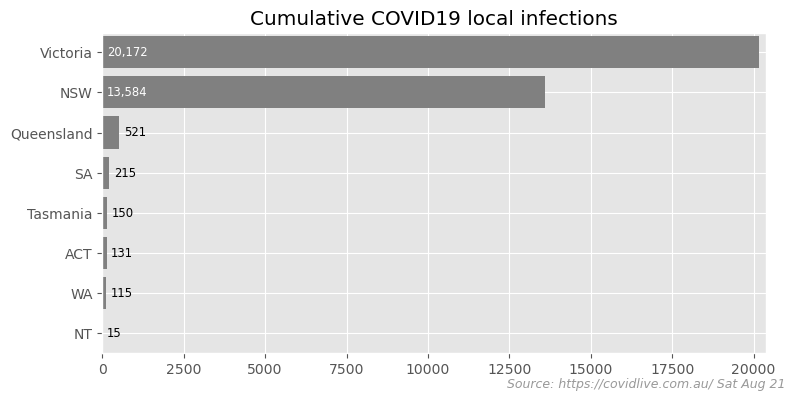

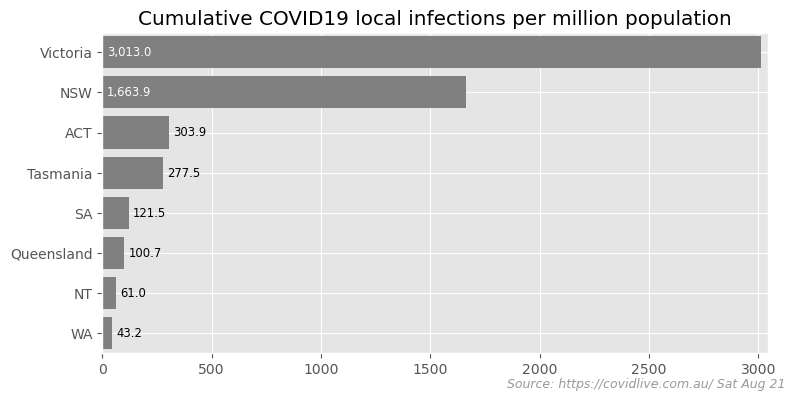

In [37]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

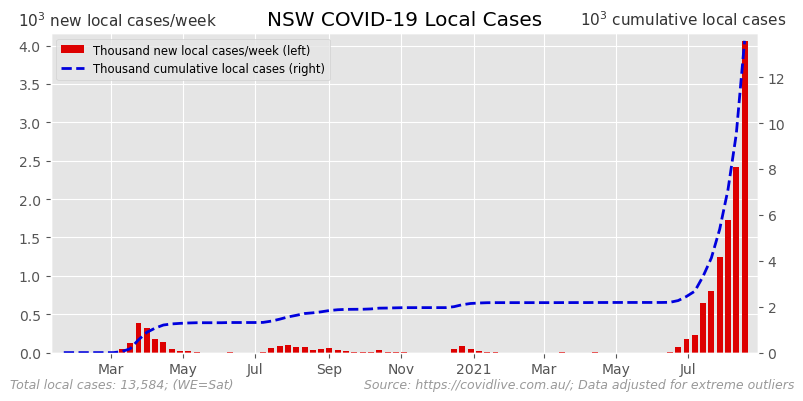

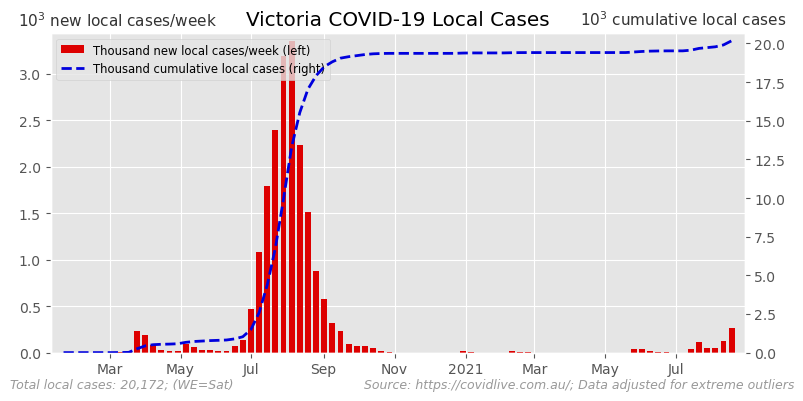

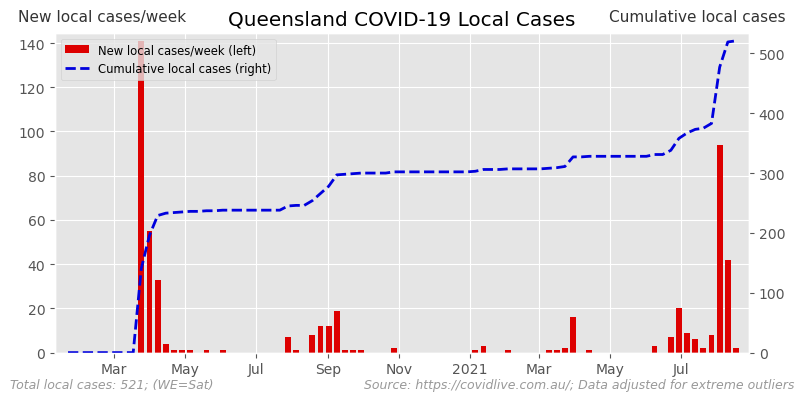

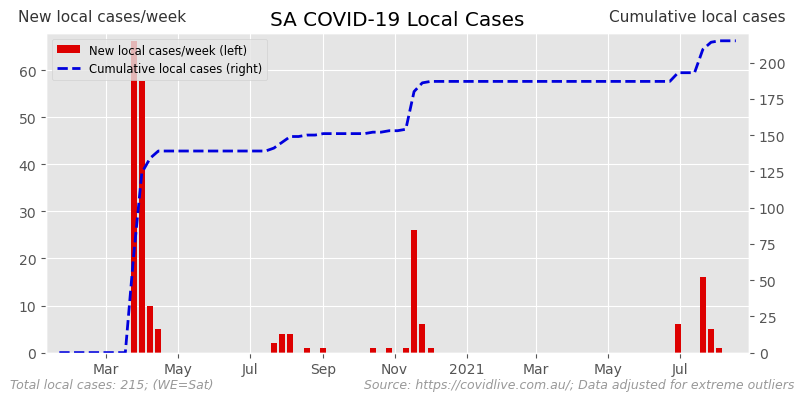

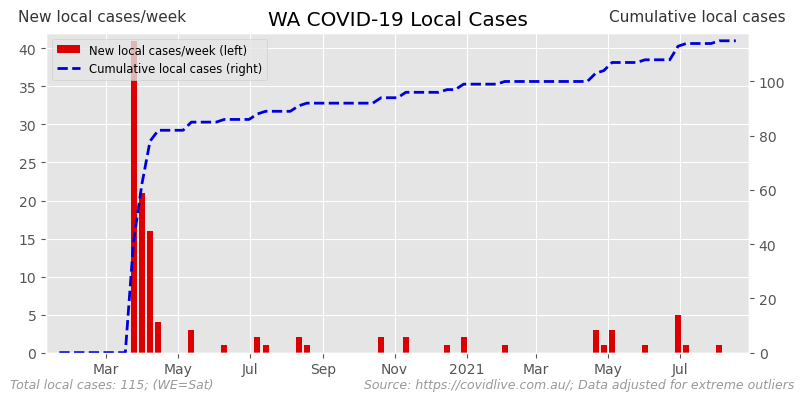

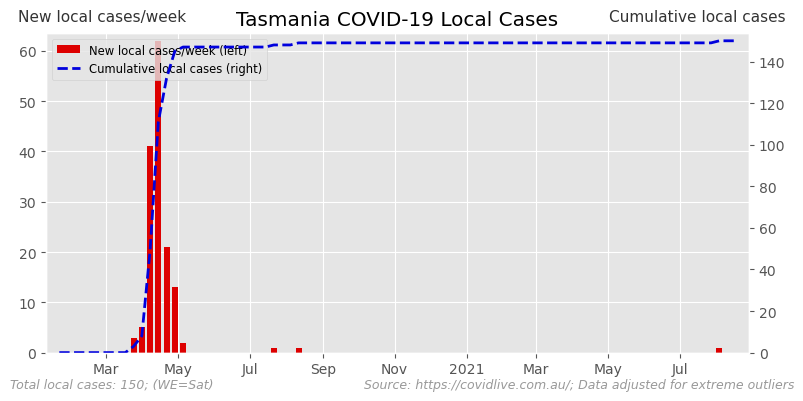

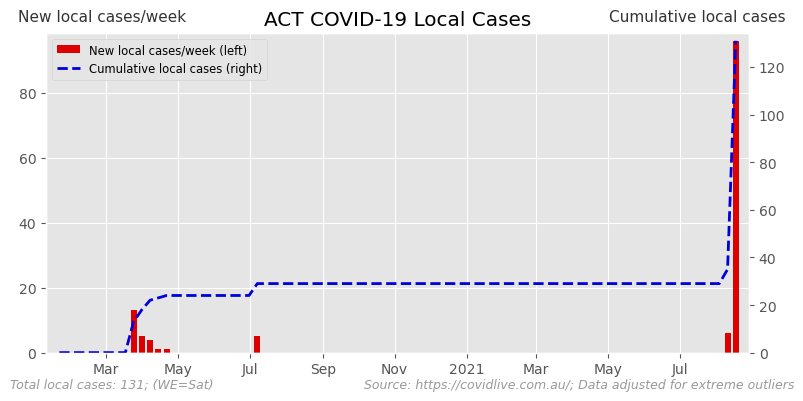

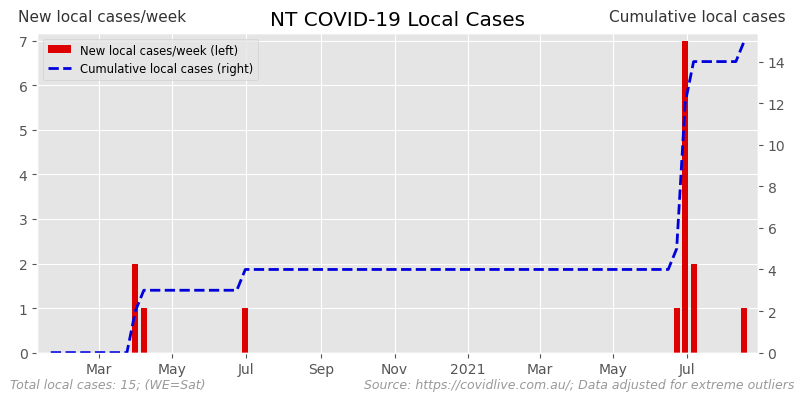

In [38]:
quality = pd.Series(dtype=str)
for state in daily_u[LOCAL].columns:
    if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
ps.plot_weekly(
    local_daily_nans, desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [39]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        MARGINS = 0.015
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(MARGINS) # seems to work here
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange')
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue')
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'Period total: {series.sum():,.0f}',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=f"{CHART_DIRECTORY}-recent-local-",
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         rfooter=SOURCE,
                         show=True,
                        )

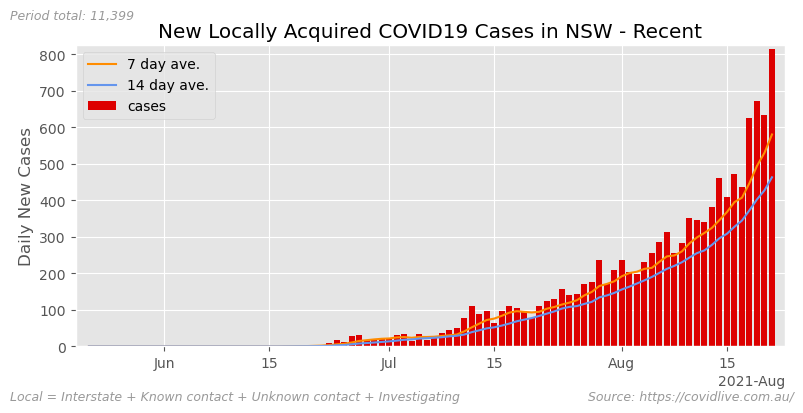

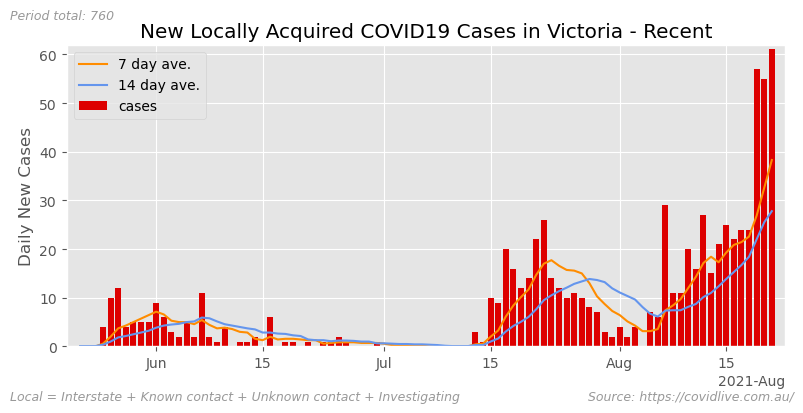

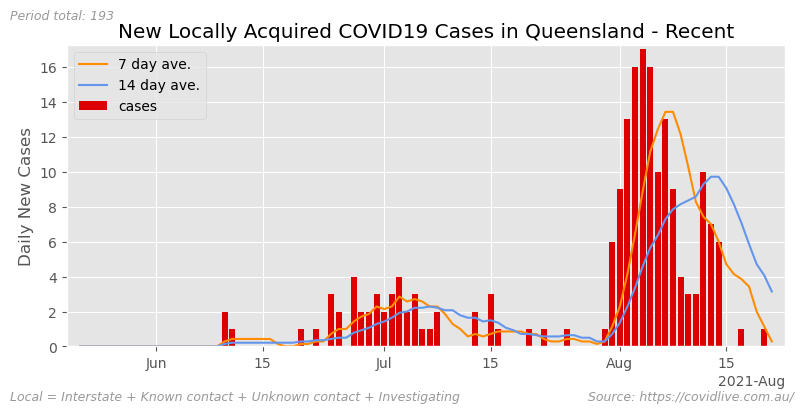

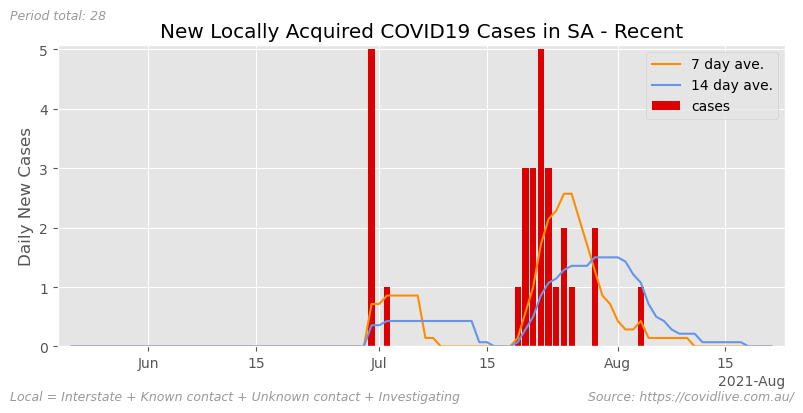

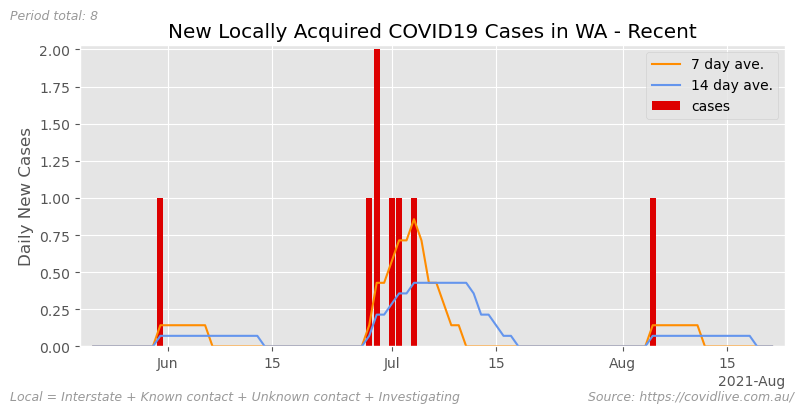

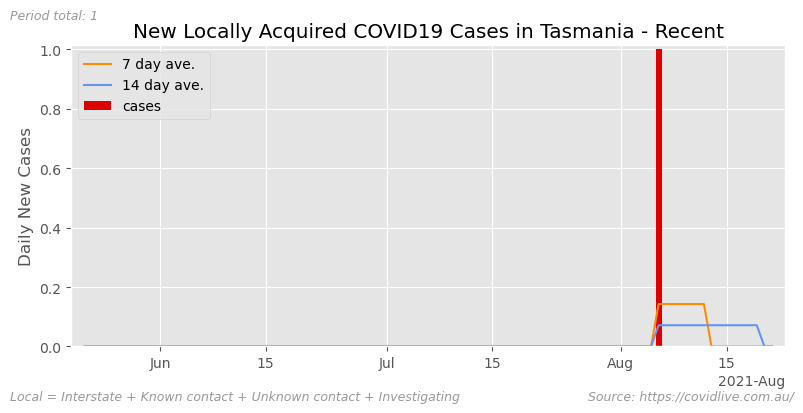

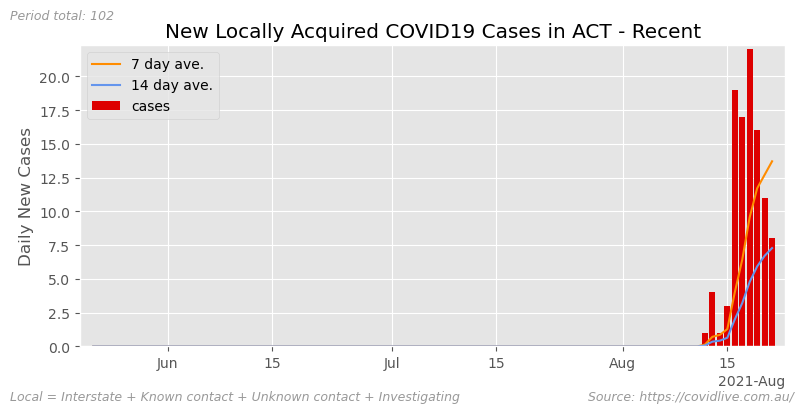

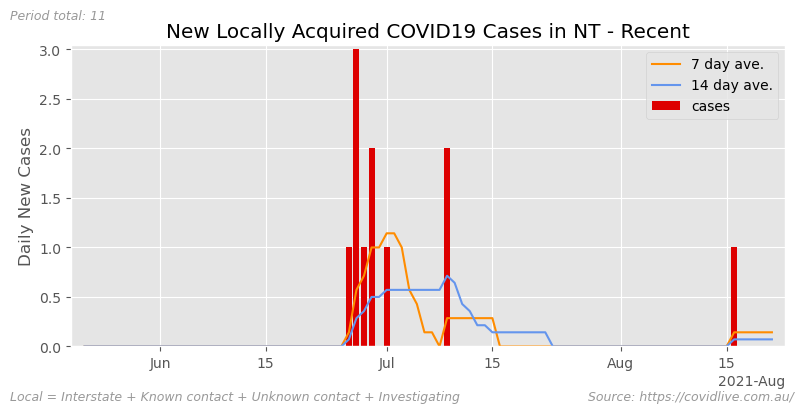

In [40]:
# and plot it
recent_bar_with_ma_plot(local_daily_nans, "cases")

### Current outbreaks

Note: requires the data for today to be updated.

In [41]:
def select(state, start_date, span_days=100):
    series = local_daily_nans[state].dropna()
    return (
        series[series.index >= pd.Timestamp(start_date)]
        .iloc[:span_days]
        .reset_index(drop=True)
    )


def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    for label, (state, start_date, reduced_span) in outbreaks.items():
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = select(state, start_date, span_days=span)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax, label=None)
            ax.legend(ncol=1, prop={'size': 8})

        # smaller margins
        MARGINS = 0.025
        ax.margins(MARGINS)
                
        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            
        ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=ylabel.split()[0],
            lfooter='Day zero is the last zero new cases day before new cases',
            rfooter=SOURCE,
            show=True,
            **kwargs, 
        )
        

colours = ['darkorange', '#555555', '#dd0000', 
           'royalblue', 'deepskyblue', 'orchid', 'darkred']

In [42]:
nsw = {
    'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
}

vic = {
    'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],    
}

qld = {
    'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ],     
}

sa = {
    'SA Jul-21':   ["SA",         '2021-07-18',  None, ],
}

act = {
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],

}

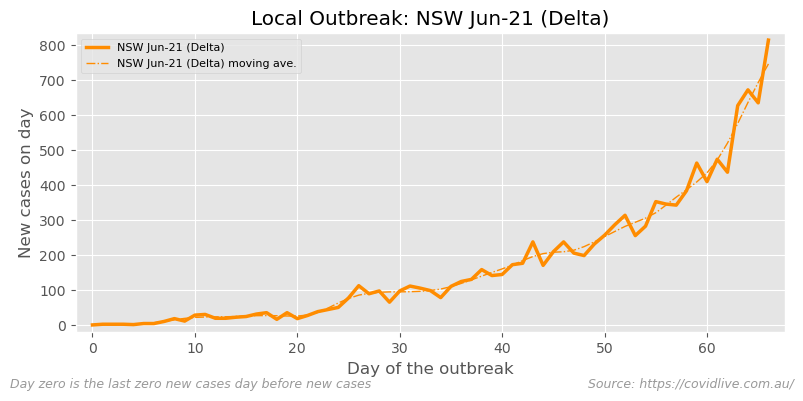

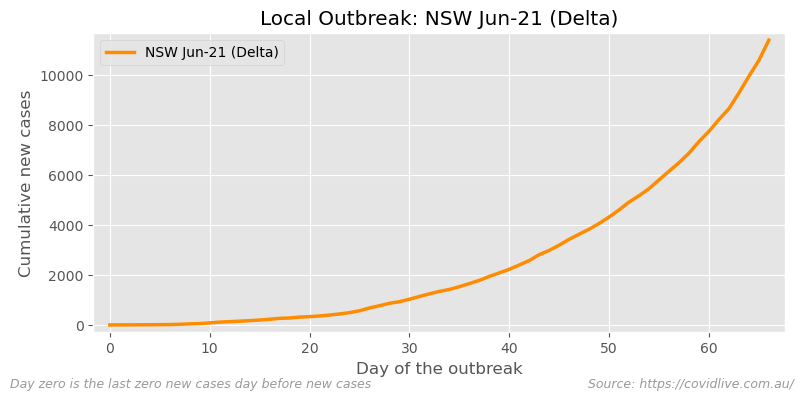

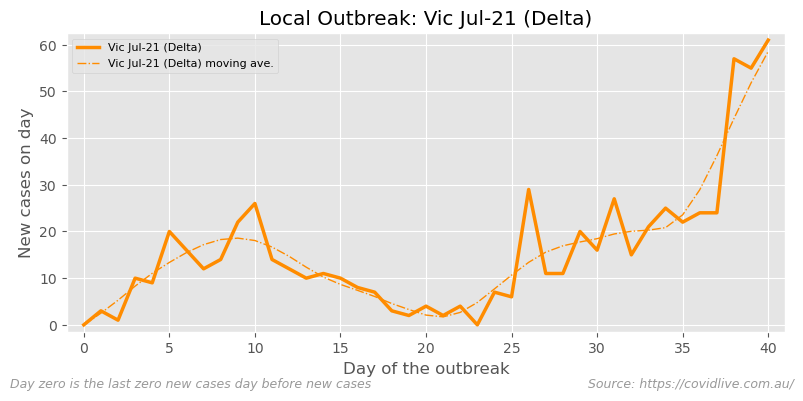

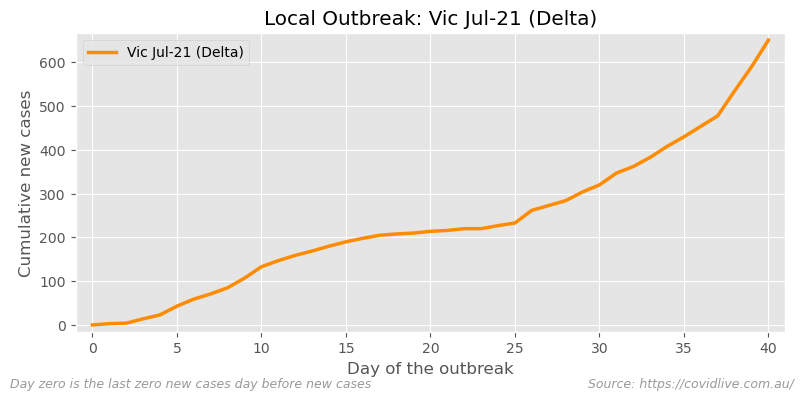

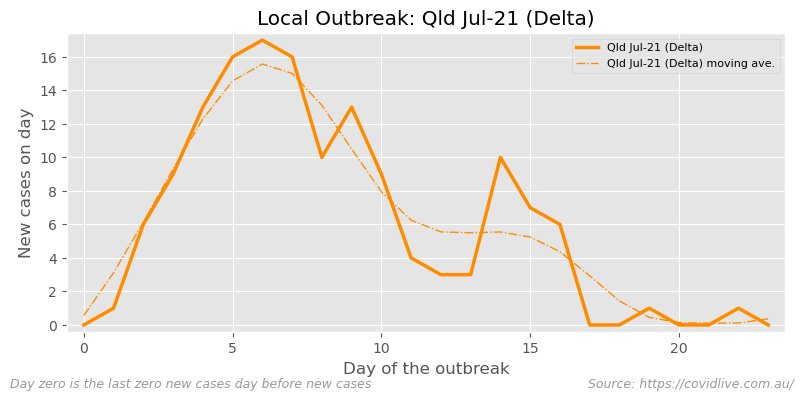

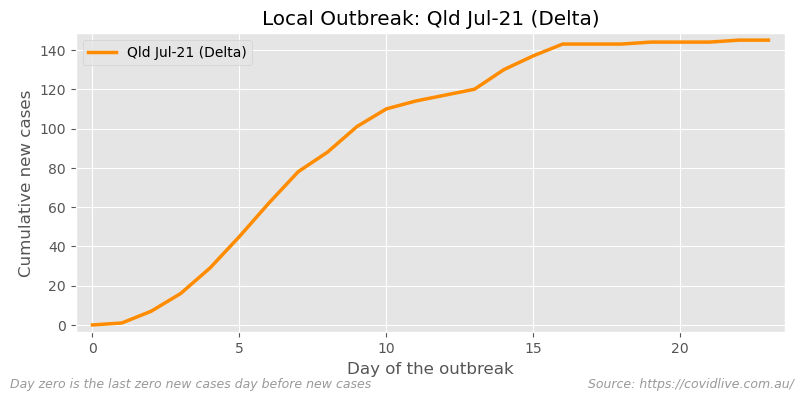

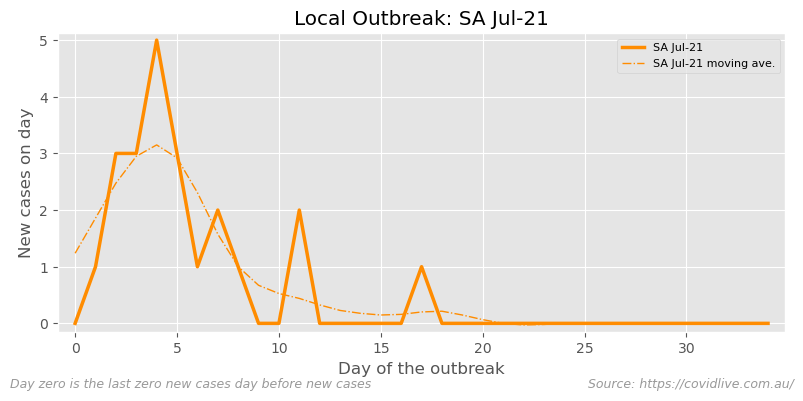

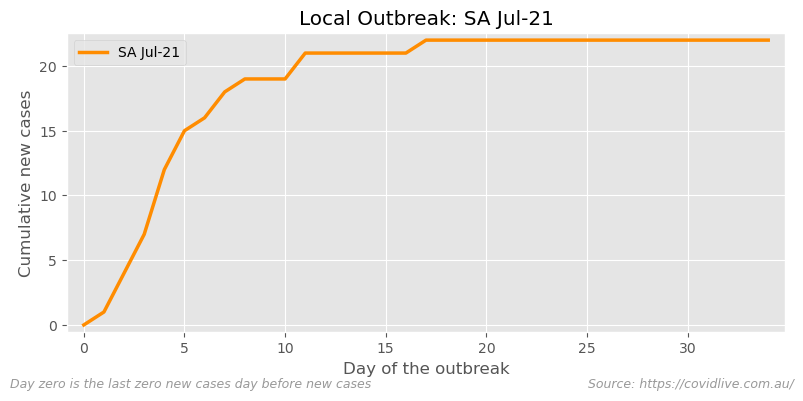

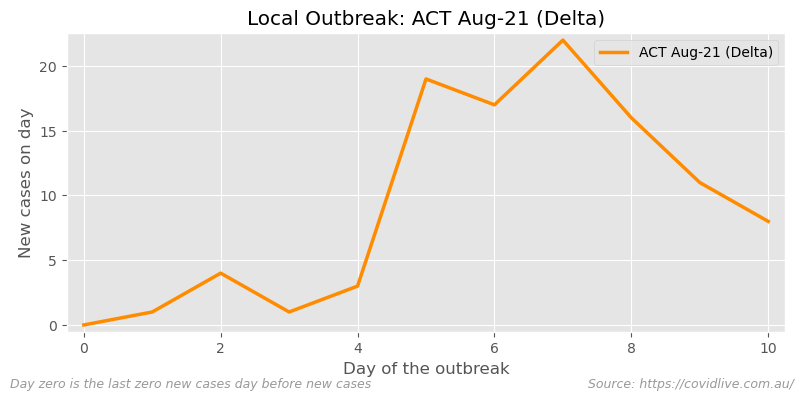

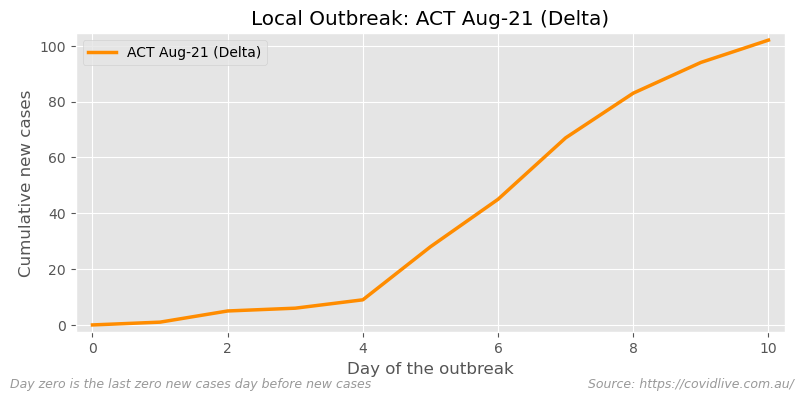

In [43]:
plot_outbreaks(nsw, colours, span_days=100)
plot_outbreaks(vic, colours, span_days=100)
plot_outbreaks(qld, colours, span_days=100)
plot_outbreaks(sa, colours, span_days=100)
plot_outbreaks(act, colours, span_days=100)
#plot_outbreaks(older, colours[3:], span_days=100)

### Historic Outbreaks
*  After (i.e. ignoring) the first wave in March/April 2020
*  Wave larger than 100 cases in total

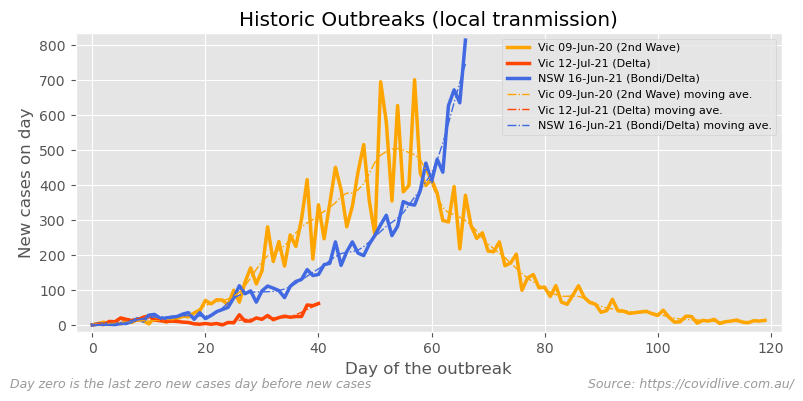

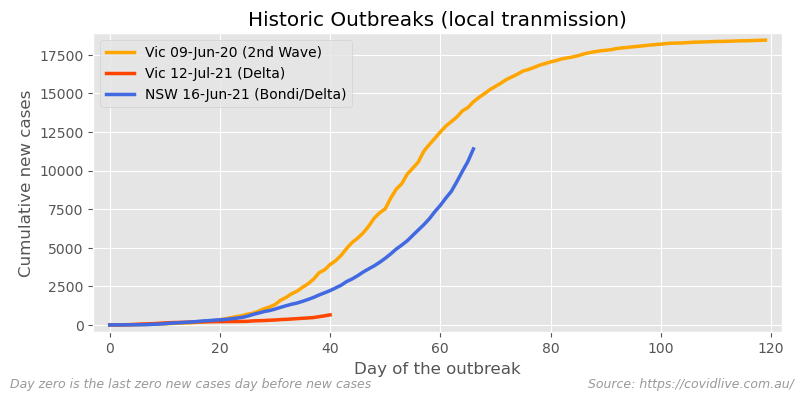

In [44]:
historic = {
    #'NSW 08-Jul-20 (Crossroads)':    ['NSW',      '2020-07-08', 120],
    #'NSW 16-Dec-20 (Avalon)':        ['NSW',      '2020-12-16', 120],
    'Vic 09-Jun-20 (2nd Wave)':      ['Victoria', '2020-06-09', 120],
    #'Vic 24-May-21 (Wollert)':       ['Victoria', '2021-05-24', 36],
    'Vic 12-Jul-21 (Delta)':         ['Victoria', '2021-07-12',  None, ],
    'NSW 16-Jun-21 (Bondi/Delta)':   ['NSW',      '2021-06-16', None],
}
colors = ['orange', 'orangered', 'royalblue',]
MAXIMUM = 121

plot_outbreaks(historic, colors, span_days=MAXIMUM, 
               title='Historic Outbreaks (local tranmission)')

### Outbreak Growth Factors

Check Vic Jun-20 (2nd Wave) starting point: [0. 4.]


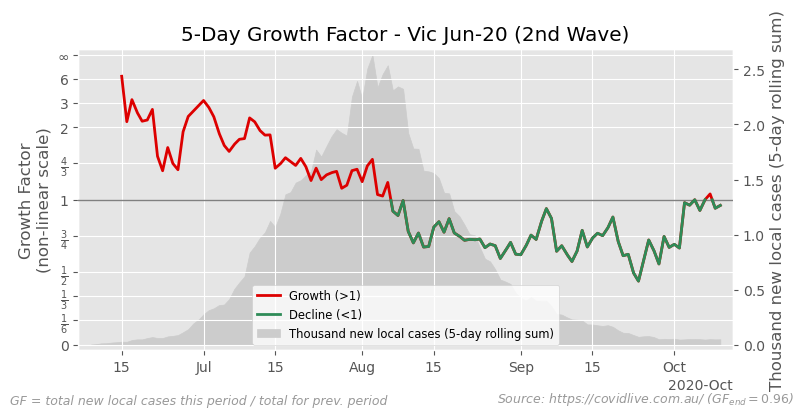

Check NSW Jun-21 (Delta-Bondi) starting point: [0. 2.]


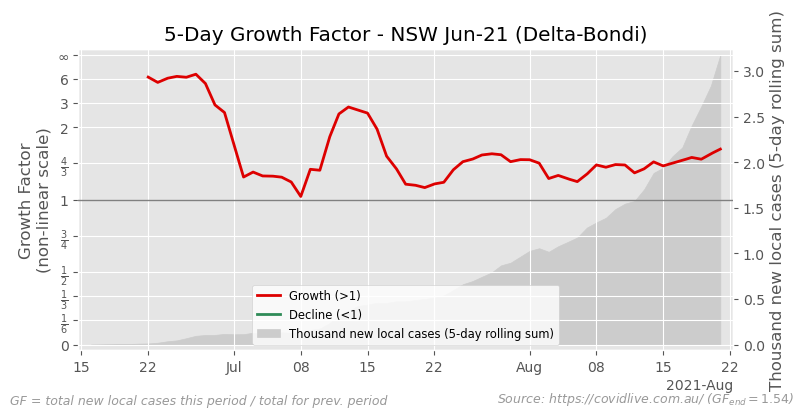

Check Vic Jul-21 (Delta) starting point: [0. 3.]


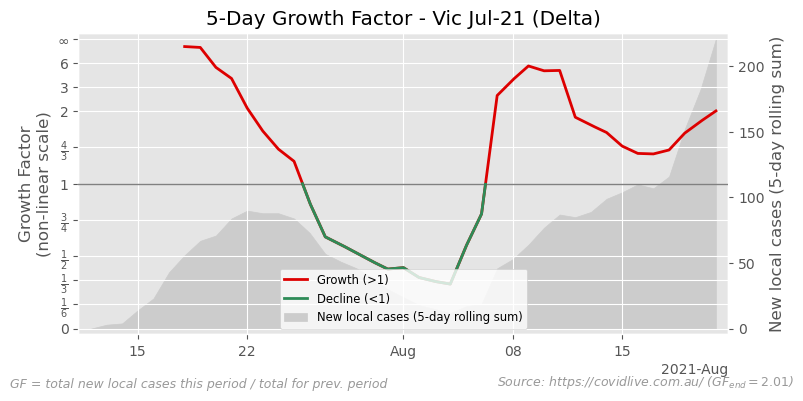

Check Qld Jul-21 starting point: [0. 1.]


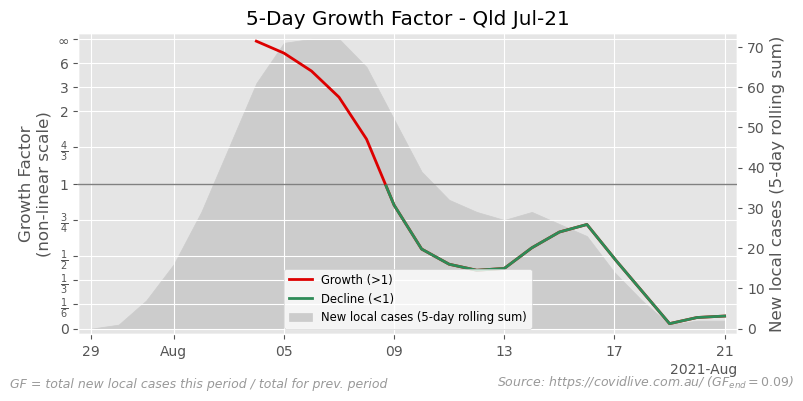

Check ACT Aug-21 (Delta) starting point: [0. 1.]


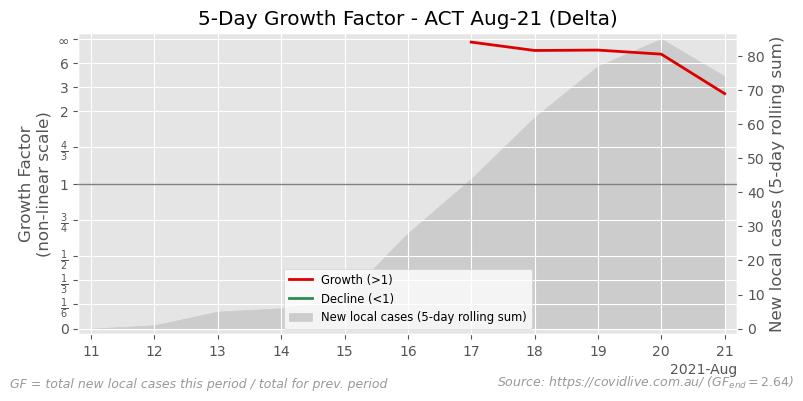

In [45]:
states = {
    # name                        state         start         length
    'Vic Jun-20 (2nd Wave)':     ('Victoria', '2020-06-09', '2020-10-10'),
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-16',  None, ],
    'Vic Jul-21 (Delta)':        ['Victoria',   '2021-07-12',  None, ],
    'Qld Jul-21':                ['Queensland', '2021-07-29',  None, ],    
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

GROWTH_FACTOR_LIST = [5, ] # [5, 7]

gf = {}
for name, (state, start, length) in states.items():
    s = local_daily_nans[state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    if length:
        s = s[s.index <= pd.Timestamp(length)]
    print(f'Check {name} starting point: {s[:2].values}')
    
    for period in GROWTH_FACTOR_LIST:

        index = f'{name}{period}'
        gf[index] = ps.plot_growth_factor(
            s,
            period=period,
            mode = 'new local cases',
            title=f'{period}-Day Growth Factor - {name}', 
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
        )

### Model for the effective reproduction number $R_t$

The SIR compartmental model in discrete terms can be expressed with the following three equations:


1.   $S_t = S_{t-1}-\beta_tI_{t−1}\frac{S_{t−1}}{N}$

1.   $I_t = I_{t−1}+\beta_tI_{t−1}\frac{S_{t−1}}{N}-\gamma I_{t−1}$

1.   $R_t = R_{t−1}+\gamma I_{t−1}$

Where:
*   $\beta_t$ = $R_t$ / infectious period
*   $\gamma$ = 1 / infectious period

The middle line of this set of equations shows that the number infectious on day t is the number infectious on the previous day, plus the newly infectious on day t, minus those who are no longer infectious on day t.

We can take the middle element, assume that S/N is one, and derive the effective reproduction number ($R_t$), based on the following identity:

$$
R_t = \frac{newly\ infectious_t}{infectious\ cohort_{t-1}} * infectious\ period
$$

We will smooth the daily infections data in order to manage noise.

We are assuming the average infectiousness period is 7 days for COVID19. 

In [46]:
def model_effective_reproduction(newly_infectious_on_day, 
                                 infectious_period=7):

    # Need at least infectious period data to make sense
    IGNORE_INITIAL = infectious_period + 1 # days 
    SMOOTH_TERM = 13
    
    # sanity check
    if len(newly_infectious_on_day) < SMOOTH_TERM:
        print(f'Insufficient data to calculate the effective reproduction number')
        return None
    
    
    # smooth infections data
    newly_infectious_t = Henderson.Henderson(newly_infectious_on_day, SMOOTH_TERM)
    
    infectious_t_minus_1 = (
        newly_infectious_t
        .rolling(infectious_period, min_periods=1)
        .sum()
        .shift(1)
        .dropna()
    )
    
    return (newly_infectious_t / infectious_t_minus_1 * infectious_period)[IGNORE_INITIAL:]
    

In [47]:
analysis_frame = {
    'Vic Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-10',  120],    
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-17',  None, ],
    'Vic Jul-21 (Delta)':        ['Victoria',   '2021-07-12',  None, ],
    'ACT Aug-21 (Delta)':        ['ACT',        '2021-08-11',  None, ], 
}

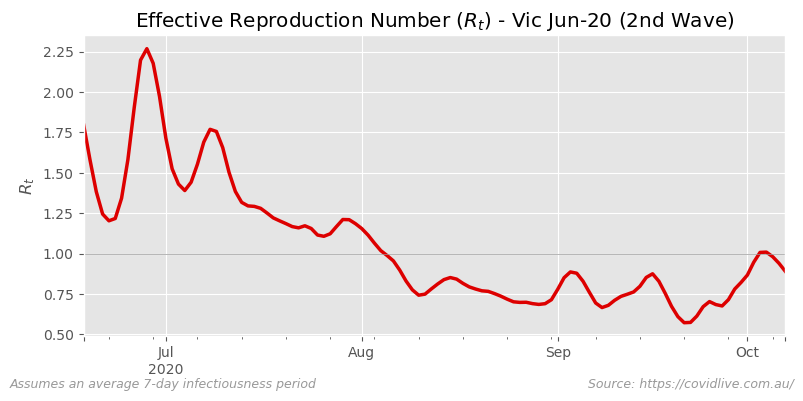

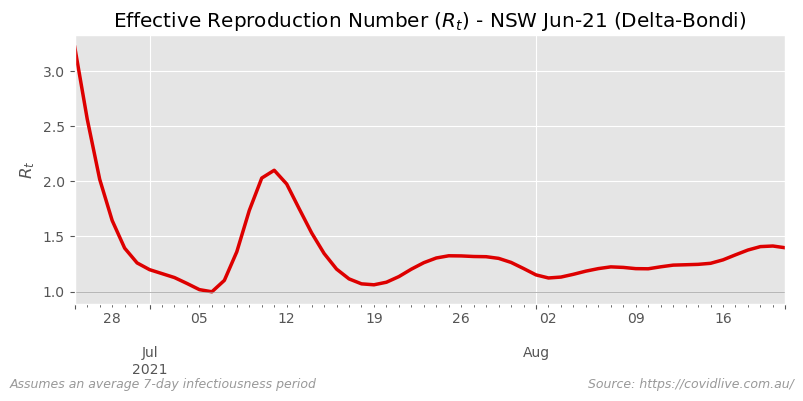

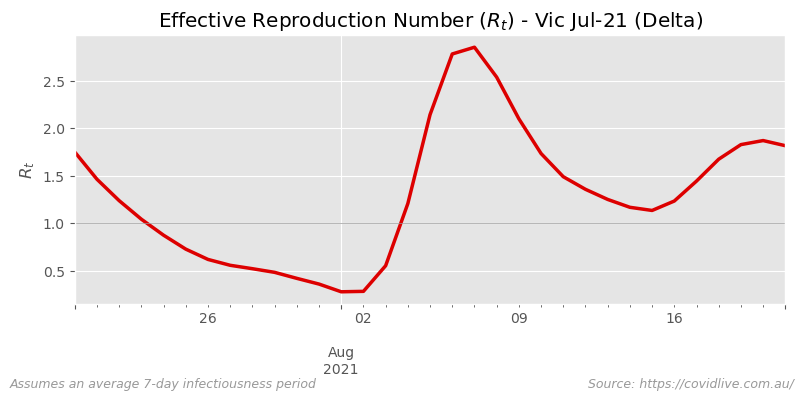

Insufficient data to calculate the effective reproduction number


In [48]:
repo_numbers = {}
for name, (state, start, length) in analysis_frame.items():
    
    # calculate
    span = length if length else 120 # days
    s = local_daily_nans[state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    s = s.iloc[:span]
    ip=7
    R_t = model_effective_reproduction(s, ip)
    if R_t is None:
        continue
    repo_numbers[name] = R_t
    
    # plot
    ax = R_t.plot(lw=2.5, label=name)
    ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'Effective Reproduction Number ($R_t$) - {name}',
            ylabel='$R_t$',
            xlabel=None,
            rfooter=SOURCE,
            lfooter=f'Assumes an average {ip}-day infectiousness period',
            show=True,
    )


### Comparative $R_t$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

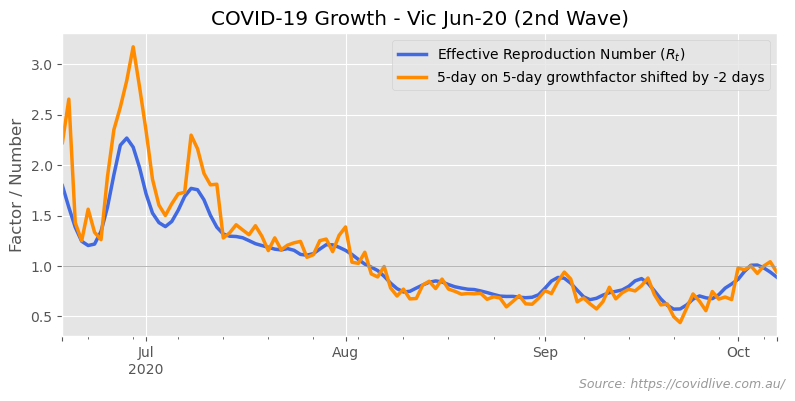

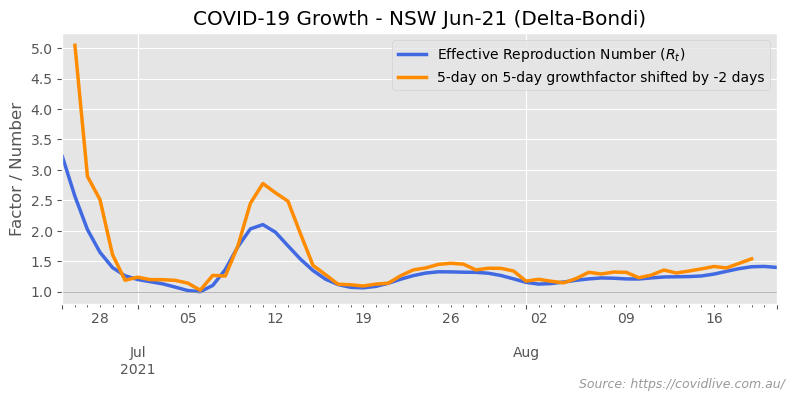

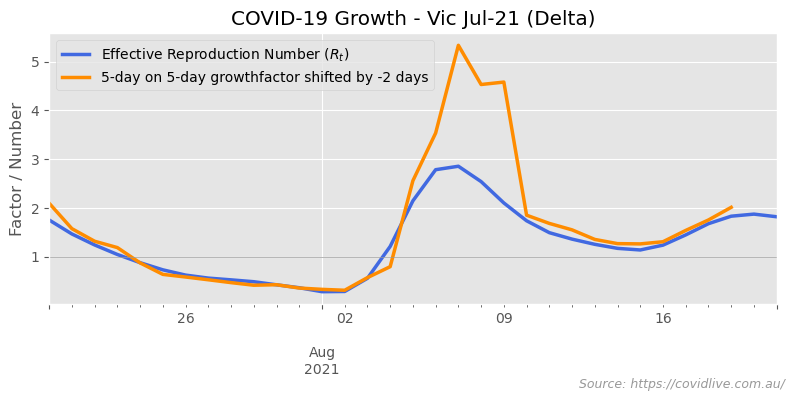

In [49]:
frames = {}
MAX_FACTOR = 6 # used for capping the y axis (None to ignore)
for r, s in repo_numbers.items():
    
    for period in GROWTH_FACTOR_LIST:
        index = f'{r}{period}'
        dict_frame = {}
        rt_label = 'Effective Reproduction Number ($R_t$)'
        dict_frame[rt_label] = s

        if index in gf:
            shift = int(-period // 2) + 1
            shifted = gf[index].shift(shift)
            dict_frame[f'{period}-day on {period}-day growth'
              f'factor shifted by {shift} days'] = shifted
        
        frames[r] = pd.DataFrame(dict_frame).dropna(how='all')
        frames[r] = frames[r][frames[r][rt_label].notna()]
            
    fig, ax = plt.subplots()
    colours = ['#dd0000', 'darkorange', 'royalblue', ]
    for col in frames[r].columns:
        line = frames[r][col].copy()
        if MAX_FACTOR:
            line = line.where(line < MAX_FACTOR, other=np.nan)
        line.plot(lw=2.5, c=colours.pop(), label=col, ax=ax)
    ax.axhline(y=1, lw=0.5, c='#999999')
    ax.legend(loc='best')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'COVID-19 Growth - {r}',
            ylabel='Factor / Number',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
    )
    

### Short-run projections for local new case growth

In [50]:
def projection(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # projection parameters
    outlook = 15 # projection days
    term = 15 # days - term for henderson moving average
    period = 7 # most recent days for establishing gowth projection
    assert(period < term)
    
    # get current underlying trend
    s = local_daily_nans[state].dropna()
    s = s[s.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    y00 = max(s_smoothed[INDEX_CASE - (2 * period)], 0)
    y0 = max(s_smoothed[INDEX_CASE - period], 0)
    y1 = max(s_smoothed[INDEX_CASE], 0)
    if y0 == 0 or y00 == 0:
        print(f'{name}: cannot forecast from a zero base')
        return
    k1 = np.log(y1 / y0) / period
    k0 = np.log(y0 / y00) / period
    
    # create forecast
    new_s = np.arange(0, outlook)
    new_s = y1 * np.exp(new_s * k1)
    projection = pd.Series(new_s, 
                         index=pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
    projection = projection.drop(projection.index[0])

    old_s = np.arange(0, outlook)
    old_s = y0 * np.exp(old_s * k0)
    historic = pd.Series(old_s, 
                         index=pd.date_range(s.index[INDEX_CASE - period], 
                                         periods=outlook, freq='D'))
    historic = historic.drop(historic.index[0])
    print(f'Historic projection for today: {historic[s.index[INDEX_CASE]]}')

    # plot
    projectn_label = f'Projection $({y1:0.2f}e ^ ' + '{' + f'{k1:0.4f}t' + '})$'
    historic_label = f'Historic Projection (as made {period} days ago)'
    frame = pd.DataFrame([s, s_smoothed, projection, historic], 
                      index=['New Cases', 'New Cases smoothed', 
                             projectn_label, historic_label]).T

    EXCESSIVE_GROWTH = 8
    if projection[-1] > (projection[1] * EXCESSIVE_GROWTH):
        # ignore rampant forecast projection
        del frame[projectn_label]

    if historic[-1] > (historic[1] * EXCESSIVE_GROWTH):
        # ignore rampant historic projection
        del frame[historic_label]
    
    ax = None
    lws = [2.5, 1.5, 2.5, 1.5]
    colors = ['#dd0000', 'darkorange', 'royalblue', 'dodgerblue']
    styles = ['-', '-.', '-', '-']
    plt.close('all')
    for i in range(len(frame.columns)):
        ax = frame[frame.columns[i]].plot(lw=lws[i], c=colors[i], ls=styles[i], 
                                          ax=ax, label=str(frame.columns[i]))
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=f'Outbreak Projection for {name}',
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'Forecast based on growth over most recent {period} '
                              'days (from Henderson smoothed trend)',
                     show=True,
                    )


Historic projection for today: 596.0569697797081


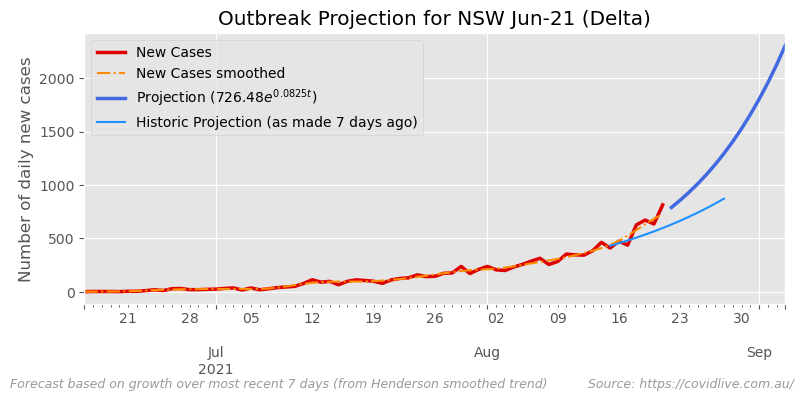

Historic projection for today: 30.46164095364385


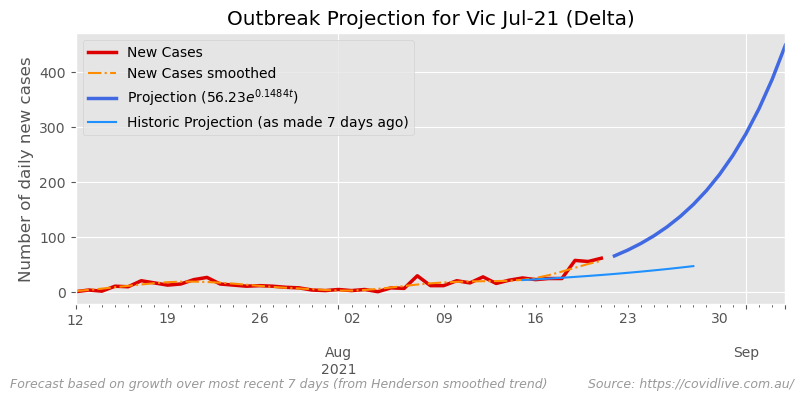

ACT Aug-21 (Delta): insufficient data for a forecast


In [51]:
if True:
    
    states = {
        # name                   state         start         stop
        'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
        'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],
        #'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ], 
        'ACT Aug-21 (Delta)':  ['ACT',        '2021-08-11',  None, ], 
    }

    for name, (state, start, stop) in states.items():
        projection(name, state, start, stop)


## Hospitalised

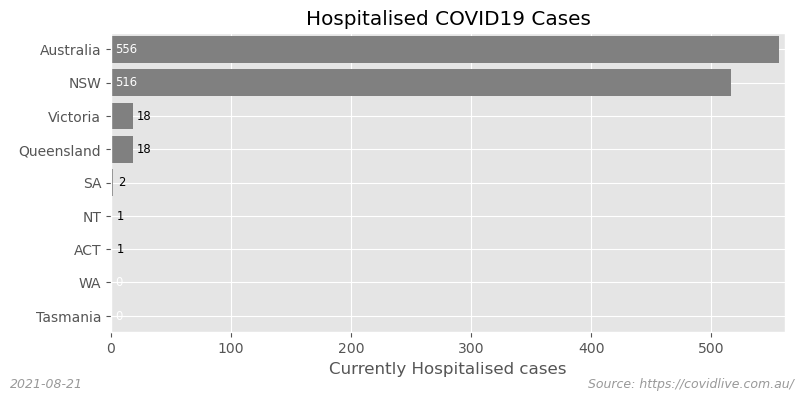

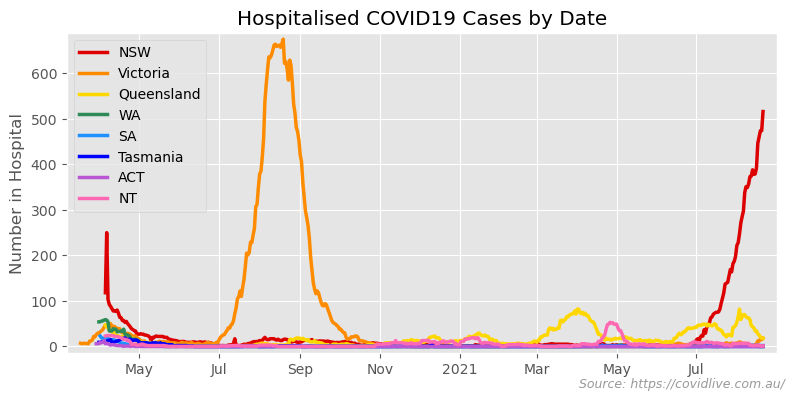

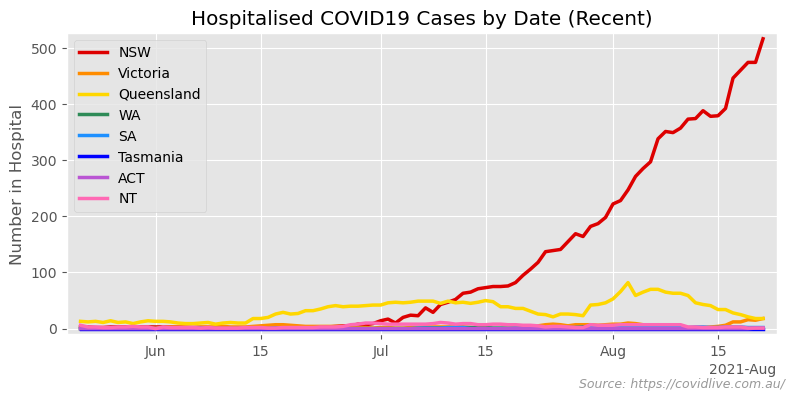

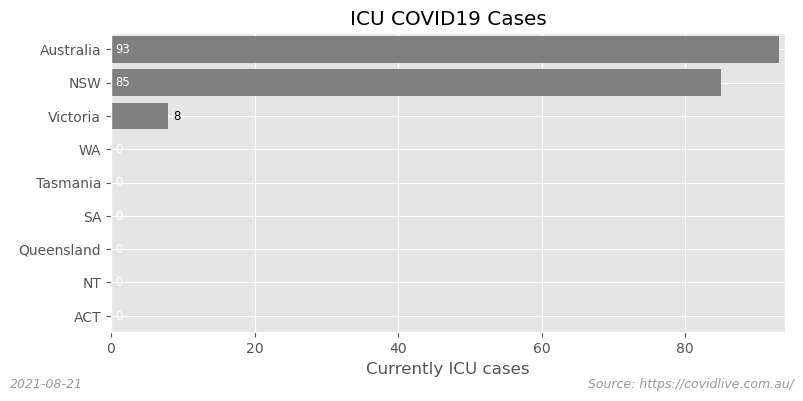

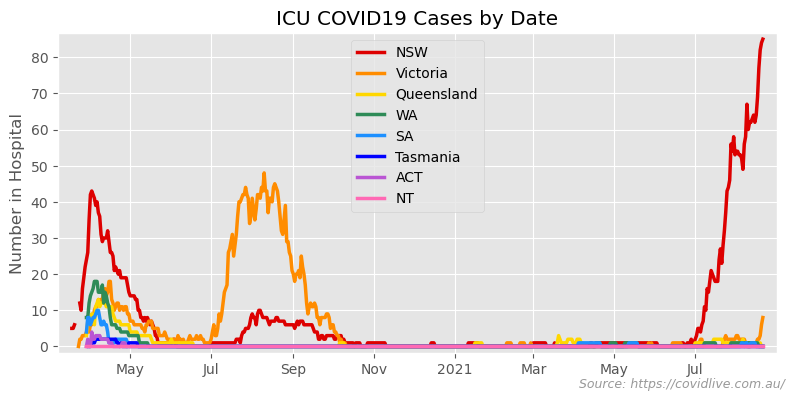

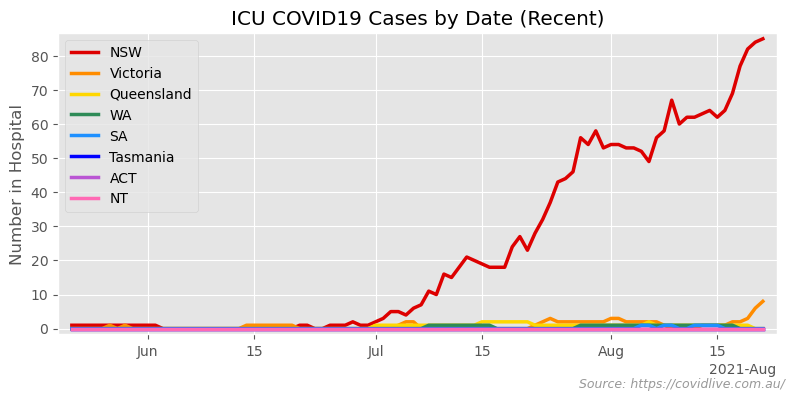

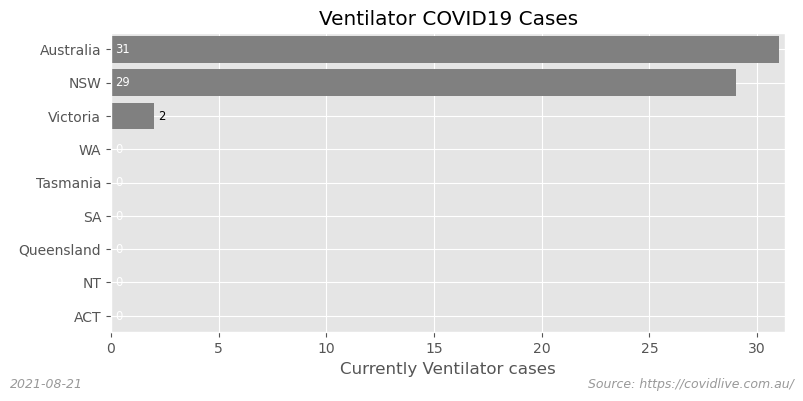

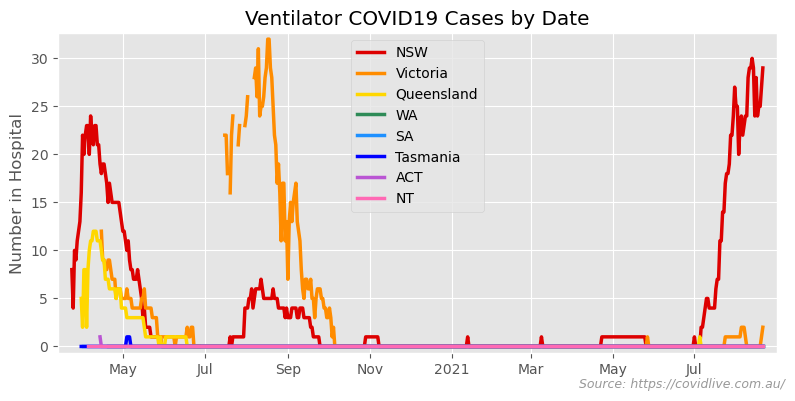

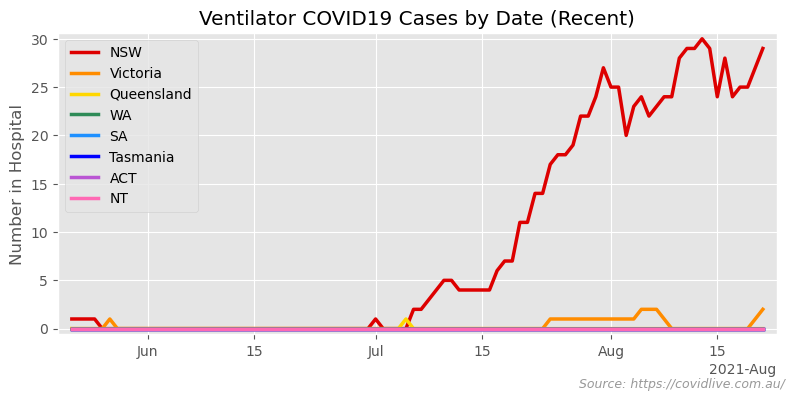

In [52]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']

for ident, desc in zip(idents, descs):

    hospital = get_pivot_table(raw_json_data, ident)
    hospital.index = pd.DatetimeIndex(hospital.index)
    hospital = hospital.dropna(axis=0, how='all')

    # bar chart of latest data
    latest = hospital.copy()
    if latest.iloc[-1].isna().any():
        latest.drop(latest.index[-1], inplace=True)
    row = latest.iloc[-1].astype(int)
    if row.sum() > 0:
        lfooter = str(row.name.date())
        title = f'{desc} COVID19 Cases'
        ps.plot_barh(row.sort_values(ascending=True), 
                     title=title,
                     xlabel=f'Currently {desc} cases',
                     save_as = f'{CHART_DIRECTORY}{title}.png',
                     rfooter=SOURCE,
                     lfooter=lfooter,
                     show=True,
                    )
    
    # plot hospitalised as a line chart
    for start in [0, -RECENT]:
        dataset = hospital.iloc[start:]
        if dataset.sum().sum() == 0:
            continue
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(0.02)
        for state in order:
            ax.plot(dataset.index, 
                    dataset[state], 
                    label=state, lw=2.5)
        ax.legend(loc='best')

        title = f'{desc} COVID19 Cases by Date'
        if start == -RECENT:
            title += ' (Recent)'
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=CHART_DIRECTORY,
                         xlabel=None,
                         ylabel='Number in Hospital',
                         rfooter=SOURCE,
                         show=True,
                        )

## Explore cases to deaths curve

In [53]:
def get_cases_deaths(state, start, stop):
    
    def _get_data(item, start, stop):
        data = (
            daily_c[item]
            .where(~end_nans[item], other=np.nan)[state]
            .dropna() # for NaNs at series end
        )
        data = data[(data.index >= pd.Timestamp(start))
                      & (data.index <= pd.Timestamp(stop))]
        return data
    
    cases = _get_data('CASE_CNT', start, stop)
    deaths = _get_data('DEATH_CNT', start, stop)
    return cases, deaths

### Establish historical baseline

For every 23.29338327091136 identified cases there was a death


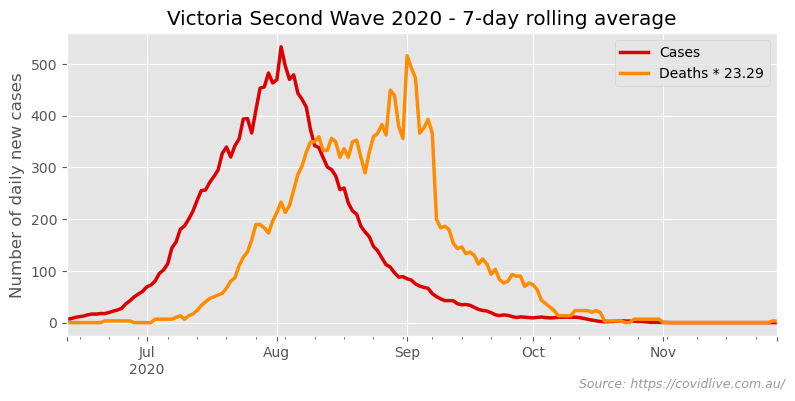

Victoria Second Wave 2020: 21 typical deviation in days from diagnosis to death


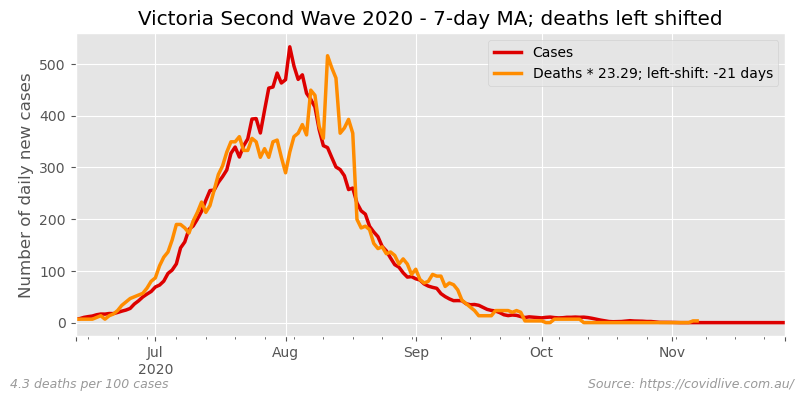

In [54]:
ROLL = 7 # days

examine = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-12-01'),
}

for title, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    factor = cases.sum() / deaths.sum()
    print(f'For every {factor} identified cases there was a death')
    
    frame = pd.DataFrame([cases.rolling(ROLL, center=True).mean(), 
                          deaths.rolling(ROLL, center=True).mean() * factor],
                         index=['Cases', f'Deaths * {factor:0.2f}']).T
    frame = frame.dropna(axis=0, how='any')
    ax = frame.plot(lw=2.5)
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day rolling average', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     show=True,
                     )
    
    max_difference = np.inf
    best = None
    for deviation in range(0, 30):
        abs_difference = (frame['Cases'] - frame[frame.columns[1]].shift(-deviation))
        abs_difference = abs_difference.abs().sum()
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
    print(f'{title}: {best} typical deviation in days from diagnosis to death')
    
    ax = pd.DataFrame([frame['Cases'], frame[frame.columns[1]].shift(-best)],
                      index=['Cases', f'Deaths * {factor:0.2f}; left-shift: {-best} days']).T.plot(lw=2.5)
    multiplier = 100
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day MA; deaths left shifted', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     show=True,
                     )


### Use above baseline to look at the recent Sydney Delta outbreak

For every 48.69 identified cases (since 2021-06-09 and up until 21 days ago) there has been a death


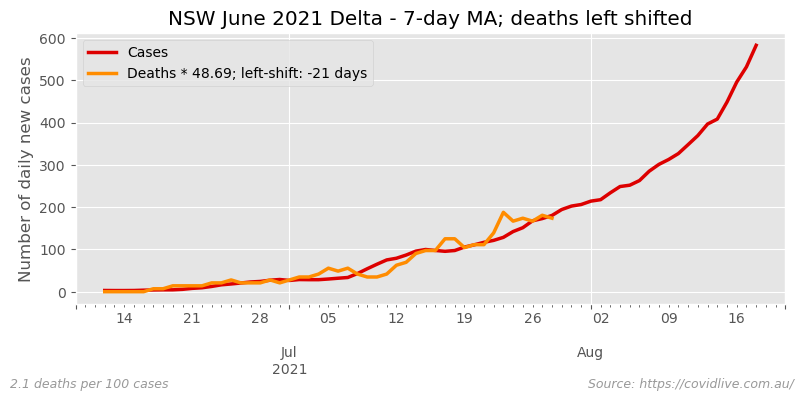

In [55]:
examine = {
        'NSW June 2021 Delta': ('NSW', '2021-06-09', '2021-12-01'),
}

for title, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    factor = cases.iloc[:-best].sum() / deaths.sum()
    print(f'For every {factor:0.2f} identified cases (since {start}'
          f' and up until {best} days ago) there has been a death')

    
    ax = pd.DataFrame([cases.rolling(ROLL, center=True).mean(), 
                       (factor * deaths.shift(-best)).rolling(ROLL, center=True).mean()],
                      index=['Cases', f'Deaths * {factor:0.2f}; left-shift: {-best} days']).T.plot(lw=2.5)
    multiplier = 100
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day MA; deaths left shifted', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     show=True,
                     )


## The End

In [56]:
print_warnings()
print('Finished')

NOTE: 2 warnings
It looks like we are missing the latest TEST_CNT for ACT, SA, Tasmania, WA
Lastest value less than its predecessor in ACTIVE_CNT for Queensland
Finished
